# **3. Linear Regression – Applied**

Excercises from **Chapter 3** of [An Introduction to Statistical Learning](https://www.statlearning.com/) with application in python by Gareth James, Daniela Witten, Trevor Hastie and Robert Tibshirani.

In [19]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
import matplotlib.pyplot as plt

import seaborn as sns

import statsmodels.api as sm

from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm

from sklearn.preprocessing import StandardScaler

from ISLP import load_data
from ISLP.models import (ModelSpec as MS, summarize, poly)

### **3.6 Lab Linear Regression**

The Boston dataset records medv (median house value) for 506
neighborhoods around Boston. We will build a regression model to pre￾dict medv using 13 predictors such as rmvar (average number of rooms per
house), age (proportion of owner-occupied units built prior to 1940), and
lstat (percent of households with low socioeconomic status)

In [20]:
Boston = load_data("Boston")
Boston.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat', 'medv'],
      dtype='object')

In [21]:
Boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


Building the model matrix by hand

In [22]:
X = pd.DataFrame(
    {'intercept': np.ones(Boston.shape[0]),
     'lstat': Boston['lstat']})
X[:4]

,intercept,lstat
0,1.0,4.98
1,1.0,9.14
2,1.0,4.03
3,1.0,2.94


In [23]:
y = Boston['medv']
model = sm.OLS(y, X)
results = model.fit()

In [24]:
summarize(results)

,coef,std err,t,P>|t|
intercept,34.5538,0.563,61.415,0.0
lstat,-0.9500,0.039,-24.528,0.0


Using Transformations: Fit and Transform

- MS(['lstat']) --> Creates the transform object

- .fit() makes the specific calculations on the given array

- .transform() method applies the ftted transformation to the array of data

In [25]:
design = MS(['lstat'])
design = design.fit(Boston)
X = design.transform(Boston)

# OR

design = MS(['lstat'])
X = design.fit_transform(Boston)
X[:4]

,intercept,lstat
0,1.0,4.98
1,1.0,9.14
2,1.0,4.03
3,1.0,2.94


In [26]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Mon, 28 Aug 2023   Prob (F-statistic):           5.08e-88
Time:                        10:51:33   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     34.5538      0.563     61.415      0.000      33.448      35.659
lstat         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
results.params

intercept    34.553841
lstat        -0.950049
dtype: float64

In [28]:
new_df = pd.DataFrame({'lstat':[5, 10, 15]})
newX = design.transform(new_df)
newX

,intercept,lstat
0,1.0,5
1,1.0,10
2,1.0,15


In [29]:
new_predictions = results.get_prediction(newX)
new_predictions.predicted_mean

array([29.80359411, 25.05334734, 20.30310057])

Producing confidence Intervals for the predited value

In [30]:
new_predictions.conf_int(alpha=0.05)

array([[29.00741194, 30.59977628],
       [24.47413202, 25.63256267],
       [19.73158815, 20.87461299]])

Prediction intervals are computing by setting obs=True

In [31]:
new_predictions.conf_int(obs=True, alpha=0.05)

array([[17.56567478, 42.04151344],
       [12.82762635, 37.27906833],
       [ 8.0777421 , 32.52845905]])

Difference between Confidence Interval and Prediction Interval:

- Confidence intervals provide information about the precision of your estimates for population parameters
- While prediction intervals provide information about the range of possible values for individual future observations.

In [32]:
def abline(ax, b, m, *args, **kwargs):
    "Add a line with slope m and intercept b to ax"
    xlim = ax.get_xlim()
    ylim = [m * xlim[0] + b, m * xlim[1] + b]
    ax.plot(xlim, ylim, *args, **kwargs)

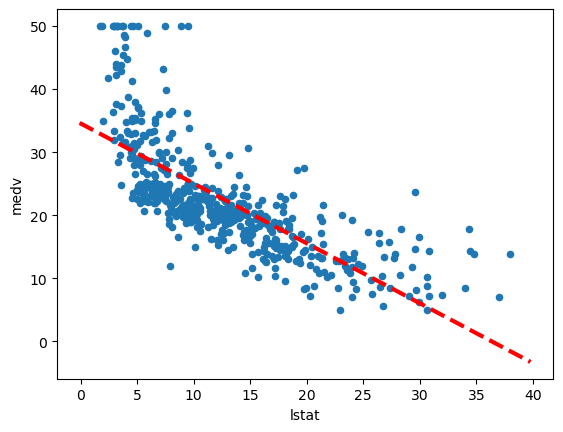

In [33]:
ax = Boston.plot.scatter('lstat', 'medv')
abline(ax,
results.params[0],
results.params[1],
'r--',
linewidth=3)

- .fittedvalues --> Get the fitted values
- .resid --> Get the residuals for the fitted values
- .get_influence() --> Can be used to compute influence measures (leverage statistic,)

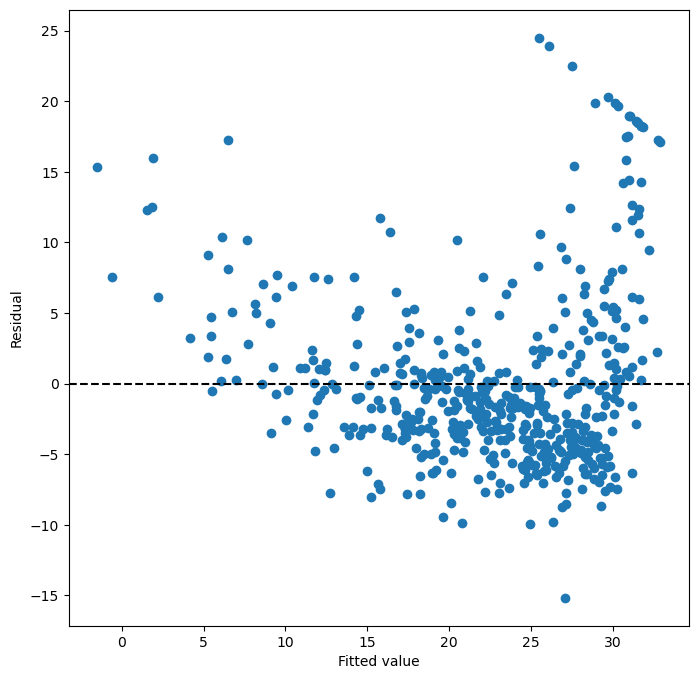

In [34]:
ax = subplots(figsize=(8,8))[1]
ax.scatter(results.fittedvalues , results.resid)
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls='--');

374

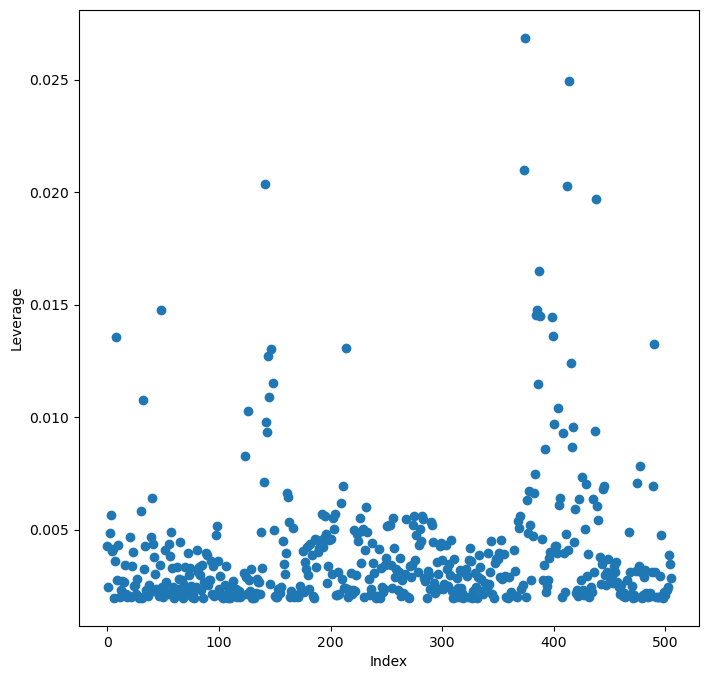

In [35]:
infl = results.get_influence()
ax = subplots(figsize=(8,8))[1]
ax.scatter(np.arange(X.shape[0]), infl.hat_matrix_diag)
ax.set_xlabel('Index')
ax.set_ylabel('Leverage')
np.argmax(infl.hat_matrix_diag)

Multi Linear Regression

Using 2 variables

In [36]:
X = MS(['lstat', 'age']).fit_transform(Boston)
model1 = sm.OLS(y, X)
results1 = model1.fit()
summarize(results1)

,coef,std err,t,P>|t|
intercept,33.2228,0.731,45.458,0.000
lstat,-1.0321,0.048,-21.416,0.000
age,0.0345,0.012,2.826,0.005


Using all 12 variables

In [37]:
terms = Boston.columns.drop('medv')
terms

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat'],
      dtype='object')

In [38]:
X = MS(terms).fit_transform(Boston)
model = sm.OLS(y, X)
results = model.fit()
summarize(results)

,coef,std err,t,P>|t|
intercept,41.6173,4.936,8.431,0.000
crim,-0.1214,0.033,-3.678,0.000
zn,0.0470,0.014,3.384,0.001
indus,0.0135,0.062,0.217,0.829
chas,2.8400,0.870,3.264,0.001
nox,-18.7580,3.851,-4.870,0.000
rm,3.6581,0.420,8.705,0.000
age,0.0036,0.013,0.271,0.787
dis,-1.4908,0.202,-7.394,0.000
rad,0.2894,0.067,4.325,0.000


In [39]:
r_2 = results.rsquared
rse = np.sqrt(results.scale)

print(r_2, rse)

0.7343070437613076 4.798034335596367


Using all variables but one

In [40]:
minus_age = Boston.columns.drop(['medv', 'age'])
Xma = MS(minus_age).fit_transform(Boston)
model1 = sm.OLS(y, Xma)
summarize(model1.fit())

,coef,std err,t,P>|t|
intercept,41.5251,4.920,8.441,0.000
crim,-0.1214,0.033,-3.683,0.000
zn,0.0465,0.014,3.379,0.001
indus,0.0135,0.062,0.217,0.829
chas,2.8528,0.868,3.287,0.001
nox,-18.4851,3.714,-4.978,0.000
rm,3.6811,0.411,8.951,0.000
dis,-1.5068,0.193,-7.825,0.000
rad,0.2879,0.067,4.322,0.000
tax,-0.0127,0.004,-3.333,0.001


List comprehension

Search for vif function in python an how it works

VIF function take as argument:
- Array or Dataframe
- Column Index of the variable

In [41]:
vals = [VIF(X, i) for i in range(1, X.shape[1])]

vif = pd.DataFrame({'vif':vals}, index=X.columns[1:])
vif

,vif
crim,1.767486
zn,2.298459
indus,3.987181
chas,1.071168
nox,4.369093
rm,1.912532
age,3.088232
dis,3.954037
rad,7.445301
tax,9.002158


Interaction Term

In [42]:
X = MS([
    'lstat', 
    'age', 
    ('lstat', 'age')]).fit_transform(Boston)

model2 = sm.OLS(y, X)
summarize(model2.fit())

,coef,std err,t,P>|t|
intercept,36.0885,1.470,24.553,0.000
lstat,-1.3921,0.167,-8.313,0.000
age,-0.0007,0.020,-0.036,0.971
lstat:age,0.0042,0.002,2.244,0.025


**Degree of 2** means that both linear and quadratic terms of 'lstat' will be included in the model.

Using **raw=True** will generate polynomial features that are directly related to the original variable, while omitting raw=True (or setting raw=False) will generate orthogonal polynomial features that may have better numerical properties but may be less directly interpretable.

In [43]:
X = MS([
    poly('lstat', degree=2, 
        #  raw=True
        ),
        'age']).fit_transform(Boston) 

model3 = sm.OLS(y, X)
results3 = model3.fit()
summarize(results3)

,coef,std err,t,P>|t|
intercept,17.7151,0.781,22.681,0.0
"poly(lstat, degree=2)[0]",-179.2279,6.733,-26.620,0.0
"poly(lstat, degree=2)[1]",72.9908,5.482,13.315,0.0
age,0.0703,0.011,6.471,0.0


In [44]:
anova_lm(results1, results3)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,503.0,19168.128609,0.0,NaN,NaN,NaN
1,502.0,14165.613251,1.0,5002.515357,177.278785,7.468491e-35


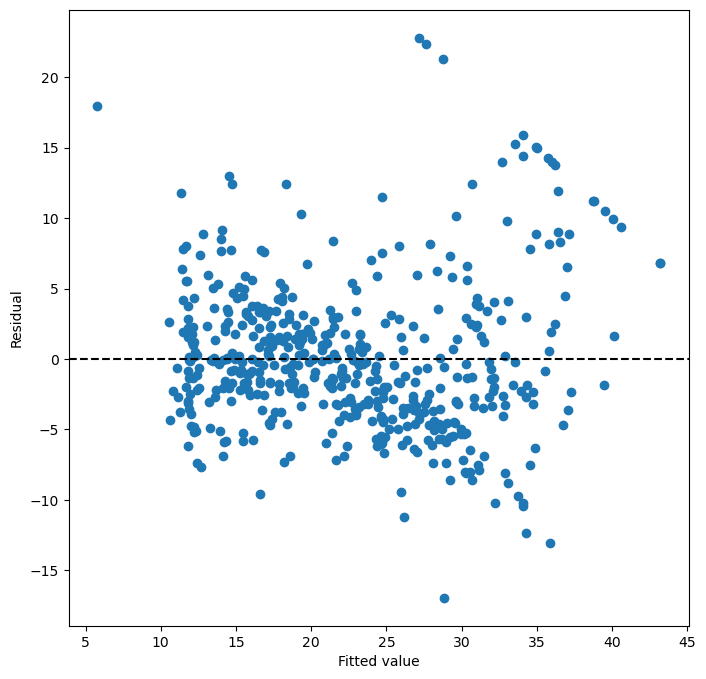

In [45]:
ax = subplots(figsize=(8,8))[1]
ax.scatter(results3.fittedvalues , results3.resid)
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls='--')

Qualitative Predictors

In [46]:
Carseats = load_data('Carseats')
Carseats.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


**ModelSpec() turn qualitative variable is dummy variables automatically** --> This is known as Hot Encoding. Which means that dummy columns will be generated. Their columns sum to 1, so to avoid colinearity with the intercept the first level is dropped

In [47]:
allvars = list(Carseats.columns.drop('Sales'))
y = Carseats['Sales']
final = allvars + [('Income', 'Advertising'),
('Price', 'Age')]
X = MS(final).fit_transform(Carseats)
model = sm.OLS(y, X)
summarize(model.fit())

,coef,std err,t,P>|t|
intercept,6.5756,1.009,6.519,0.000
CompPrice,0.0929,0.004,22.567,0.000
Income,0.0109,0.003,4.183,0.000
Advertising,0.0702,0.023,3.107,0.002
Population,0.0002,0.000,0.433,0.665
Price,-0.1008,0.007,-13.549,0.000
ShelveLoc[Good],4.8487,0.153,31.724,0.000
ShelveLoc[Medium],1.9533,0.126,15.531,0.000
Age,-0.0579,0.016,-3.633,0.000
Education,-0.0209,0.020,-1.063,0.288


In [48]:
X.head()

,intercept,CompPrice,Income,Advertising,Population,Price,ShelveLoc[Good],ShelveLoc[Medium],Age,Education,Urban[Yes],US[Yes],Income:Advertising,Price:Age
0,1.0,138,73,11,276,120,0.0,0.0,42,17,1.0,1.0,803.0,5040.0
1,1.0,111,48,16,260,83,1.0,0.0,65,10,1.0,1.0,768.0,5395.0
2,1.0,113,35,10,269,80,0.0,1.0,59,12,1.0,1.0,350.0,4720.0
3,1.0,117,100,4,466,97,0.0,1.0,55,14,1.0,1.0,400.0,5335.0
4,1.0,141,64,3,340,128,0.0,0.0,38,13,1.0,0.0,192.0,4864.0


Key methods:
- .resid
- .fittedvalue
- .get_prediction 
    - .predicted_mean
    - .conf_int

### **3.7 Applied Exercises**

#### **Question 8. This question involves the use of simple linear regression on the Auto data set.**

In [49]:
data = pd.read_csv('Auto.csv')
data = data[data.horsepower != '?']
data['horsepower'] = pd.to_numeric(data['horsepower'])
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [50]:
data.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin', 'name'],
      dtype='object')

##### **A)** Use the sm.OLS() function to perform a simple linear regression with mpg as the response and horsepower as the predictor. Use the summarize() function to print the results. Comment on the output. For example:

* I. Is there a relationship between the predictor and the response?
* II. How strong is the relationship between the predictor and the response?
* III. Is the relationship between the predictor and the response positive or negative?
* IV. What is the predicted mpg associated with a horsepower of 98? What are the associated 95 % confdence and prediction intervals?

Guidelines:
- mpg (Response)
- Horsepower (Predictor)

In [ ]:
X = MS(['horsepower']).fit_transform(data)
y = data['mpg']
model = sm.OLS(y, X)
results_auto = model.fit()
summarize(results_auto)

,coef,std err,t,P>|t|
intercept,39.9359,0.717,55.660,0.0
horsepower,-0.1578,0.006,-24.489,0.0


In [ ]:
test_X = pd.DataFrame({'horsepower':[92]})
new_test_X = MS(['horsepower']).fit_transform(test_X)
new_test_X

,intercept,horsepower
0,1.0,92


In [ ]:
mpg_predictions = results_auto.get_prediction([1,92])
mpg_predictions.predicted_mean

# OR

mpg_predictions = results_auto.get_prediction(new_test_X)
mpg_predictions.predicted_mean

array([25.41414555])

In [ ]:
mpg_predictions = results_auto.get_prediction(new_test_X)

print(f'mpg prediction: {mpg_predictions.predicted_mean}')
print(f'Confidence Interval: {mpg_predictions.conf_int(alpha=0.05)}')
print(f'Prediction Interval: {mpg_predictions.conf_int(alpha=0.05, obs=True)}')

mpg prediction: [25.41414555]
Confidence Interval: [[24.90201072 25.92628039]]
Prediction Interval: [[15.75551978 35.07277132]]


* I. Is there a relationship between the predictor and the response?

    > Yes there is a relation, confirmed by the p-value < 0.05
* II. How strong is the relationship between the predictor and the response?

    > For each 1 unit change in horsepower the mpg decreases by -0.1578
* III. Is the relationship between the predictor and the response positive or negative?

    > The relation is negative
* IV. What is the predicted mpg associated with a horsepower of 98? What are the associated 95 % confdence and prediction intervals?

    > mpg prediction: 25.41414555

    > Confidence Interval: (24.90201072, 25.92628039)
    
    > Prediction Interval: (15.75551978, 35.07277132)

##### **B)** Plot the response and the predictor in a new set of axes ax. Use the ax.axline() method or the abline() function defned in the lab to display the least squares regression line.

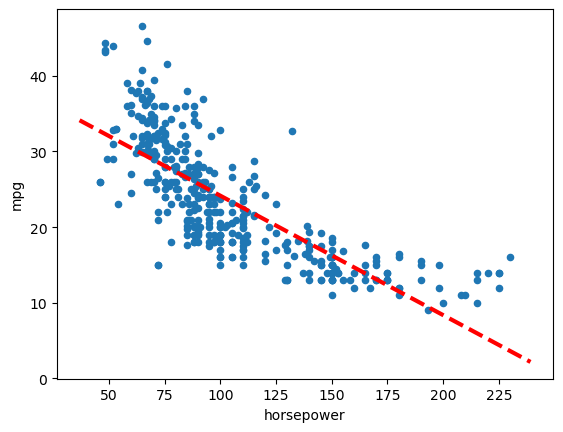

In [55]:
ax = data.plot.scatter('horsepower', 'mpg')
abline(ax,
results_auto.params[0],
results_auto.params[1],
'r--',
linewidth=3)

##### **C)** Produce some of diagnostic plots of the least squares regression fit as described in the lab. Comment on any problems you see with the ft.

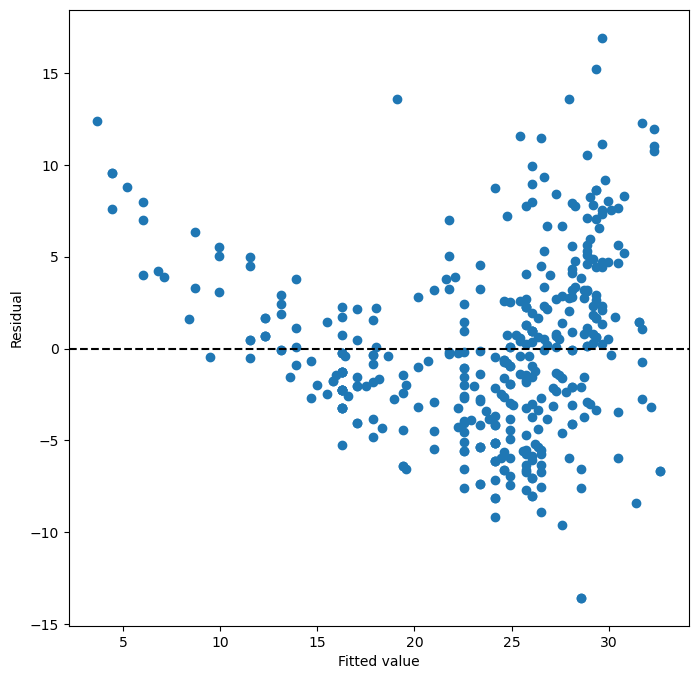

In [56]:
ax = subplots(figsize=(8,8))[1]
ax.scatter(results_auto.fittedvalues, results_auto.resid)
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls='--')


- The residuals seems not have an equal variance through different values of Y, which may indicate the presence of heteroscedasticity. Heteroscedasticity can lead to inefficient estimates and may affect the validity of statistical tests. **It can be a sign that the underlying relationship between the variables is not entirely linear**, **or that some important variable is missing from the model**. 

#### **Question 9. Multi Linear regression: This exercise involves the Auto data set**

##### **A)** Produce a scatterplot matrix which includes all of the variables in the data set.

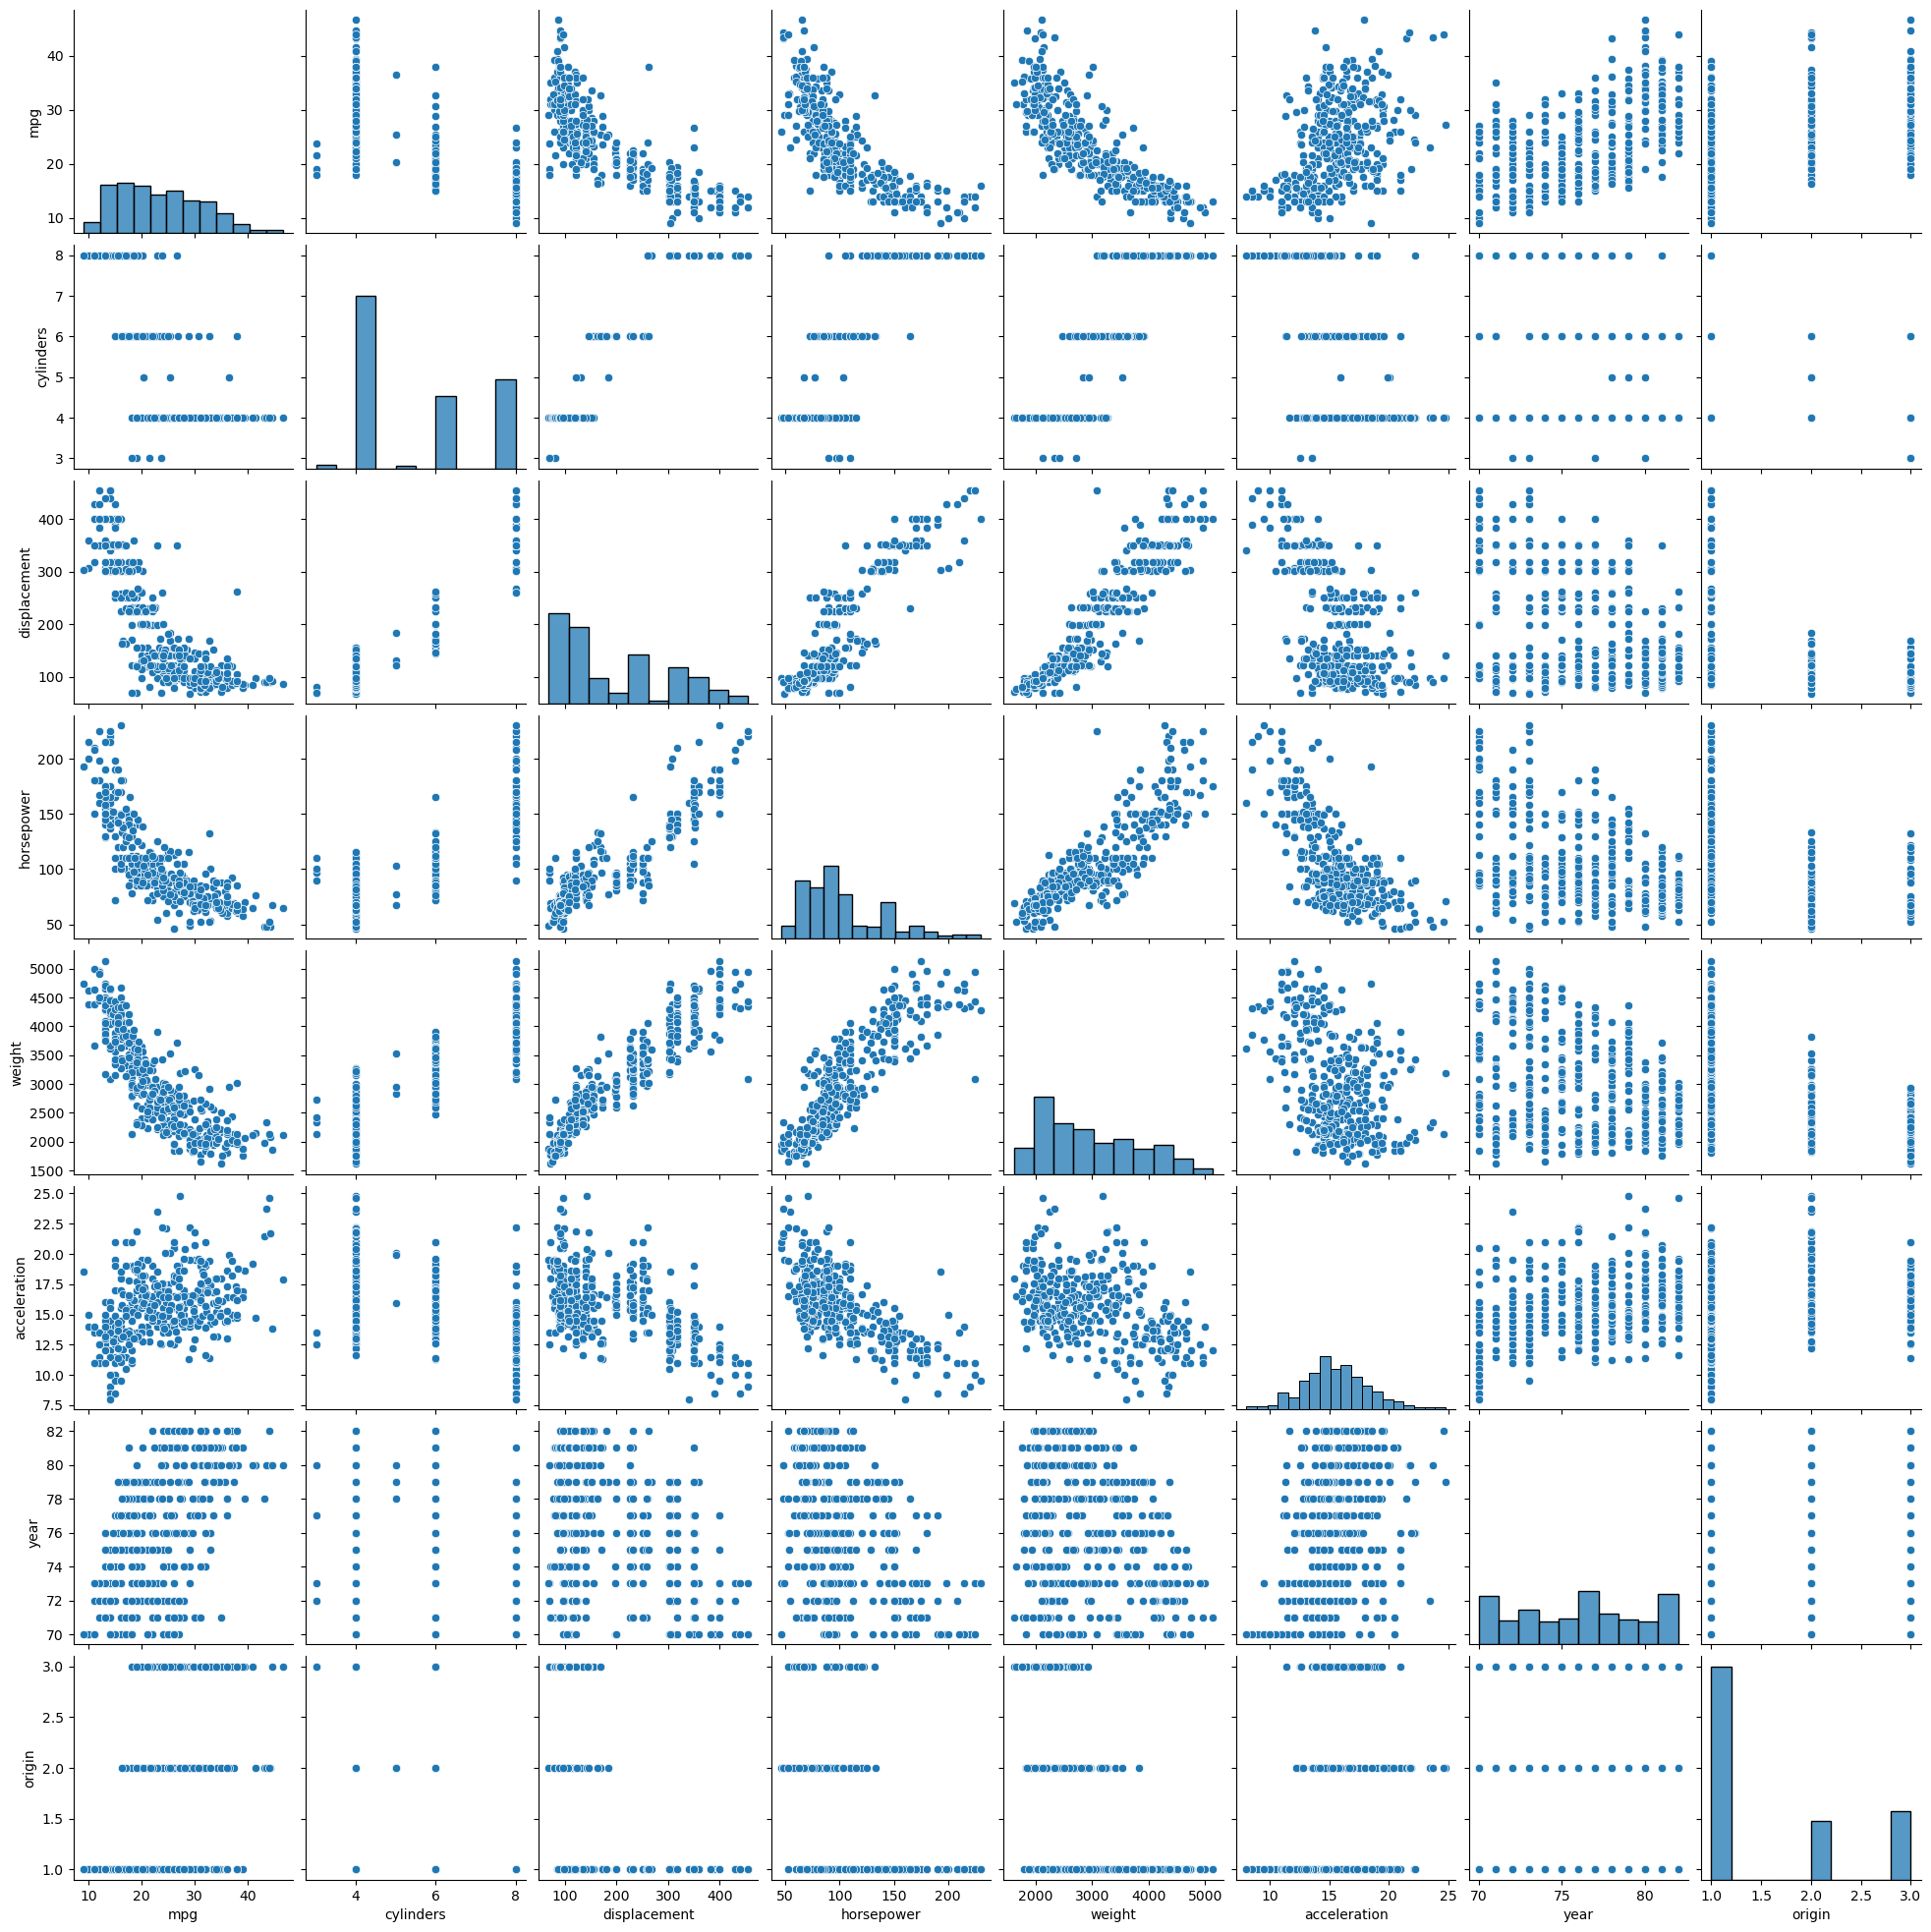

In [58]:
sns.pairplot(data)

##### **B)** Compute the matrix of correlations between the variables using the DataFrame.corr() method.

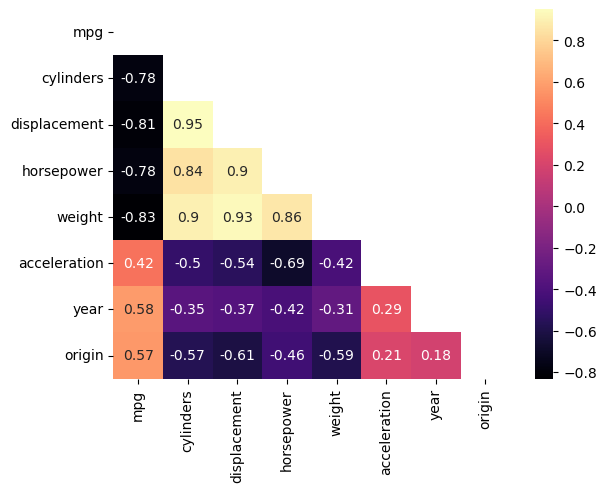

In [59]:
corr = data.corr()
mask = np.triu(np.ones_like(corr))

sns.heatmap(corr, annot = True, cmap = 'magma', mask=mask)

plt.show()

##### C)  Use the sm.OLS() function to perform a multiple linear regression with mpg as the response and all other variables except name as the predictors. Use the summarize() function to print the results. Comment on the output. For instance

- i. Is there a relationship between the predictors and the response? Use the anova_lm() function from statsmodels to
answer this question.
    - Analyzing the output of the anova_lm() function we can see that adding other Xs variables to the model increased its performance
- ii. Which predictors appear to have a statistically signifcant relationship to the response?
    - The predictors that appear to have a statistically significant relationship to the response are: Displacement, Weight, year and origin
- iii. What does the coefcient for the year variable suggest?
    - It suggest that older models tend to have lower mpg, while newer models tend to have higher mpg

In [60]:
X_var = data.columns.drop(['mpg', 'name'])

X = MS(X_var).fit_transform(data)
Y = data['mpg']

mlr_auto = sm.OLS(y, X)
results_mlr_auto = mlr_auto.fit()
summarize(results_mlr_auto)

,coef,std err,t,P>|t|
intercept,-17.2184,4.644,-3.707,0.000
cylinders,-0.4934,0.323,-1.526,0.128
displacement,0.0199,0.008,2.647,0.008
horsepower,-0.0170,0.014,-1.230,0.220
weight,-0.0065,0.001,-9.929,0.000
acceleration,0.0806,0.099,0.815,0.415
year,0.7508,0.051,14.729,0.000
origin,1.4261,0.278,5.127,0.000


Tree variables in the model were not statistically significant, they are: cylinders, horsepower and acceleration. This is probably because there is multicolinearity between the variables as we can observe in the heatmap from the previous question.

Furthermore, year and origin are the variables responsible for the highest affect in mpg by 1 unit change. Both have a positive effect, older models tend to have lower mpg, while newer models tend to have higher mpg. This same logic applies to the variable origin.

In [61]:
anova_lm(results_auto, results_mlr_auto)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,390.0,9385.915872,0.0,NaN,NaN,NaN
1,384.0,4252.212530,6.0,5133.703341,77.267308,5.376746e-63


##### D) Produce some of diagnostic plots of the linear regression fit as described in the lab. Comment on any problems you see with the fit. Do the residual plots suggest any unusually large outliers? Does the leverage plot identify any observations with unusually high leverage?

(-5.0, 5.0)

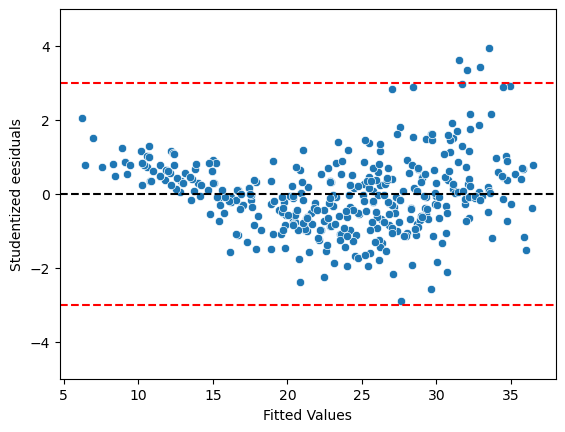

In [62]:
# Calculating studentized residuals
residuals = results_mlr_auto.resid
resid_mean = residuals.mean()
resid_std = residuals.std()

studentized_residuals = (results_mlr_auto.resid - resid_mean) / resid_std

# Ploting the residuals X fitted values
ax = sns.scatterplot(x = results_mlr_auto.fittedvalues, y = studentized_residuals)

ax.set_xlabel('Fitted Values')
ax.set_ylabel('Studentized eesiduals')
ax.axhline(0, c='k', ls='--')
ax.axhline(3, c='r', ls='--')
ax.axhline(-3, c='r', ls='--')
ax.set_ylim(-5, 5)

We have a few outliers in the positive scale of the residuals, and the residuals seems not have an equal variance through different values of Y, which may indicate the presence of heteroscedasticity. 

Heteroscedasticity can lead to inefficient estimates and may affect the validity of statistical tests. **It can be a sign that the underlying relationship between the variables is not entirely linear**, **or that some important variable is missing from the model**. 

13

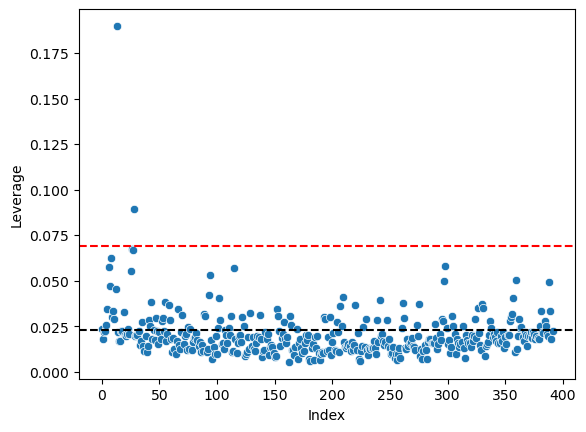

In [63]:
infl = results_mlr_auto.get_influence()

ax = sns.scatterplot(x = np.arange(X.shape[0]), y = infl.hat_matrix_diag)
ax.set_xlabel('Index')
ax.set_ylabel('Leverage')
ax.axhline((X.shape[1] +1) / X.shape[0], c='k', ls='--')
ax.axhline((X.shape[1] +1) / X.shape[0] * 3, c='r', ls='--')
np.argmax(infl.hat_matrix_diag)

This plot show the leverage statistics for each data point. A high leverage statisitcs indicates points that have their X variable values far from the mean, in other words, an unusual combination of the X's variables in a multi-dimension set. High leverage points can have a strong influence on the slope and intercept of the regression line . On the other hand, a low leverage statistics are points that have their X's variables close to the mean, these points, normally, are well fitted by the model and have little influence in the regression line.


A rule of thumb is to consider observations with leverage values greater than 

$$2 * \frac{p+1}{n}$$

or 

$$3 * \frac{p+1}{n}$$

as potential points of concern.


We can see that we have 2 points over the red line (which represents the rule of thumb * 3), which are high leverage points and are probably affecting the fit of our model.

##### E) Fit some models with interactions as described in the lab. Do any interactions appear to be statistically signifcant?

In [64]:
X_var = list(data.columns.drop(['mpg', 'name']))
X_var_interactions = X_var + [('cylinders', 'horsepower'), ('weight', 'acceleration'), ('displacement', 'year')]

X = MS(X_var_interactions).fit_transform(data)
Y = data['mpg']

mlr_auto = sm.OLS(y, X)
results_mlr_auto = mlr_auto.fit()
summarize(results_mlr_auto)

,coef,std err,t,P>|t|
intercept,-23.0615,11.136000,-2.071,0.039
cylinders,-3.1084,0.597000,-5.206,0.000
displacement,0.1255,0.038000,3.318,0.001
horsepower,-0.2587,0.036000,-7.162,0.000
weight,-0.0020,0.002000,-1.195,0.233
acceleration,0.2216,0.290000,0.764,0.445
year,1.0398,0.096000,10.861,0.000
origin,0.8454,0.248000,3.412,0.001
cylinders:horsepower,0.0308,0.005000,6.201,0.000
weight:acceleration,-0.0001,0.000097,-1.243,0.215


Statistical Significant interaction terms
- Cylinders and Horsepoer appears to be statistically significant
- Displacement and Year appears to be statistically significant

##### F) Try a few diferent transformations of the variables, such as log(X), $\sqrt{X}$, $X^2$. Comment on your fndings.

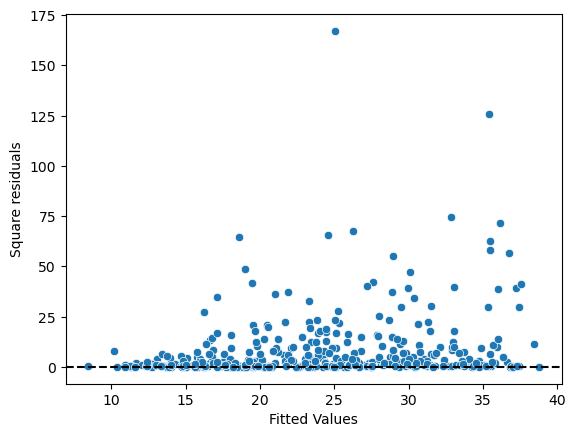

In [65]:
# Calculating studentized residuals
residuals = results_mlr_auto.resid
square_residuals = np.square(residuals)

# Ploting the residuals X fitted values
ax = sns.scatterplot(x = results_mlr_auto.fittedvalues, y = square_residuals)

ax.set_xlabel('Fitted Values')
ax.set_ylabel('Square residuals')
ax.axhline(0, c='k', ls='--')

Squaring the residuals amplificate the visual difference between the residuals, which may be good for spotting outliers easier.

c:\Users\ferna\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


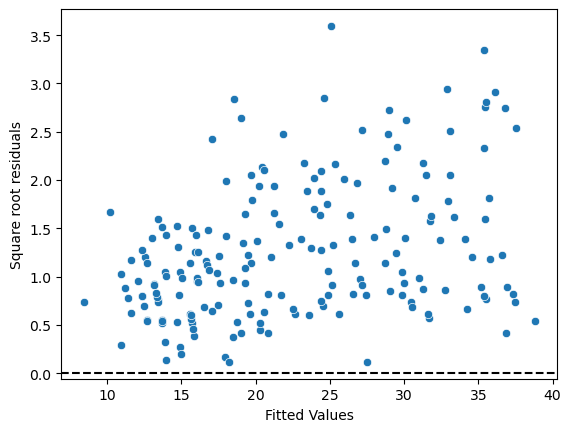

In [66]:
# Calculating studentized residuals
residuals = results_mlr_auto.resid
sqrt_residuals = np.sqrt(residuals)

# Ploting the residuals X fitted values
ax = sns.scatterplot(x = results_mlr_auto.fittedvalues, y = sqrt_residuals)

ax.set_xlabel('Fitted Values')
ax.set_ylabel('Square root residuals')
ax.axhline(0, c='k', ls='--')

Taking the square root of the residuals makes the data points, visualy, more clustered together.

c:\Users\ferna\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


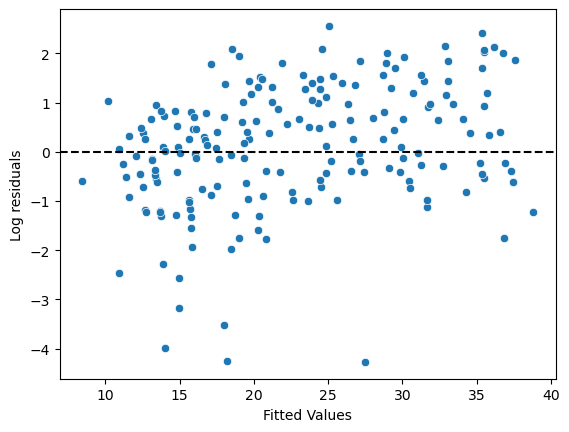

In [67]:
# Calculating studentized residuals
residuals = results_mlr_auto.resid
log_residuals = np.log(residuals)

# Ploting the residuals X fitted values
ax = sns.scatterplot(x = results_mlr_auto.fittedvalues, y = log_residuals)

ax.set_xlabel('Fitted Values')
ax.set_ylabel('Log residuals')
ax.axhline(0, c='k', ls='--')

#### **Question 10. This question should be answered using the Carseats data set.**

##### A) Fit a multiple regression model to predict Sales using Price, Urban, and US.

In [68]:
Carseats = load_data('Carseats')
Carseats.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [69]:
X = MS(['Price', 'Urban', 'US']).fit_transform(Carseats)
y = Carseats['Sales']

results_mlr_carseats = sm.OLS(y, X).fit()

summarize(results_mlr_carseats)

,coef,std err,t,P>|t|
intercept,13.0435,0.651,20.036,0.000
Price,-0.0545,0.005,-10.389,0.000
Urban[Yes],-0.0219,0.272,-0.081,0.936
US[Yes],1.2006,0.259,4.635,0.000


In [70]:
results_mlr_carseats.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Mon, 28 Aug 2023   Prob (F-statistic):           2.39e-23
Time:                        10:51:41   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     13.0435      0.651     20.036      0.000      11.764      14.323
Price         -0.0545      0.005    -10.389      0.000      -0.065      -0.044
Urban[Yes]    -0.0219      0.272     -0.081      0.936      -0.556       0.512
US[Yes]        1.2006      0.259      4.635      0.000       0.691       1.710
==============================================================================
Omnibus:                        0.676   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.713   Jarque-Bera (JB):                0.758
Skew:                           0.093   Prob(JB):                        0.684
Kurtosis:                       2.897   Cond. No.                         628.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### B) Provide an interpretation of each coefcient in the model. Becareful—some of the variables in the model are qualitative!

Interpretation:

- **Price:** Is a statistical significant coeficient, given low p-value of t-stat. The coefficient states a negative relationship between Price and Sales: as Price increases, Sales decreases. 1 unit decrease in the price turns to be a 54,5 units increase in the sales
- **Urban[Yes]:** Is not a statistical significant coefficient, although it has a coefficient just half lower than the price coefficient, the urban variable has a much large std error which explain its non significance. If the store is urban the sales would decrease by 21.9 units
- **US[Yes]:** Is a statistical significant coeficient,with a positive correlation with the sales. Which means that if the store is in the US sales increases by 1,200 units

##### C) Write out the model in equation form, being careful to handle the qualitative variables properly.

$$f(x) = 13.04 - 0.0545 * price - 0.0219 * Urban[Yes] + 1.2006 * US[Yes]$$

##### D) For which of the predictors can you reject the null hypothesis H0 : βj = 0?

We can reject the null hypothesis that the coefficient is 0 for the Price and US[Yes] predictors

##### E) On the basis of your response to the previous question, fit a smaller model that only uses the predictors for which there is evidence of association with the outcome.

In [71]:
X = MS(['Price', 'US']).fit_transform(Carseats)
y = Carseats['Sales']

results_mlr_carseats_1 = sm.OLS(y, X).fit()

summarize(results_mlr_carseats_1)

,coef,std err,t,P>|t|
intercept,13.0308,0.631,20.652,0.0
Price,-0.0545,0.005,-10.416,0.0
US[Yes],1.1996,0.258,4.641,0.0


In [72]:
results_mlr_carseats_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Mon, 28 Aug 2023   Prob (F-statistic):           2.66e-24
Time:                        10:51:41   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     13.0308      0.631     20.652      0.000      11.790      14.271
Price         -0.0545      0.005    -10.416      0.000      -0.065      -0.044
US[Yes]        1.1996      0.258      4.641      0.000       0.692       1.708
==============================================================================
Omnibus:                        0.666   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.717   Jarque-Bera (JB):                0.749
Skew:                           0.092   Prob(JB):                        0.688
Kurtosis:                       2.895   Cond. No.                         607.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### F) How well do the models in (a) and (e) fit the data?

Both models fit the data well, as evidenced by the $R^2$ value of 0.239 in both cases. This statistic indicates that approximately 23.9% of the variance in the response variable $Y$ can be explained by the predictor variables in the models. The fact that the $R^2$ value remains unchanged after excluding the non-significant variable "urban" demonstrates that this variable does not contribute significantly to the explanatory power of the model.

Furthermore, the increase in the F-statistic when the non-significant variable is excluded is an indication of a more efficient model. In statistical terms, the F-statistic is a measure of how well the explanatory variables as a whole explain the variation in the response variable. An increased F-statistic implies that the model with fewer variables (in this case, without "urban") is better at explaining the variance in the response variable, considering the degrees of freedom.

##### G) Using the model from (e), obtain 95 % confdence intervals for the coefcient(s).

In [73]:
# Extract 95% confidence intervals
conf_inter_95 = results_mlr_carseats_1.conf_int(alpha=0.05)
conf_inter_95.rename(index=str, columns={0: "min.", 1: "max.",})

,min.,max.
intercept,11.79032,14.271265
Price,-0.06476,-0.044195
US[Yes],0.69152,1.707766


##### H) Is there evidence of outliers or high leverage observations in the model from (e)?

42

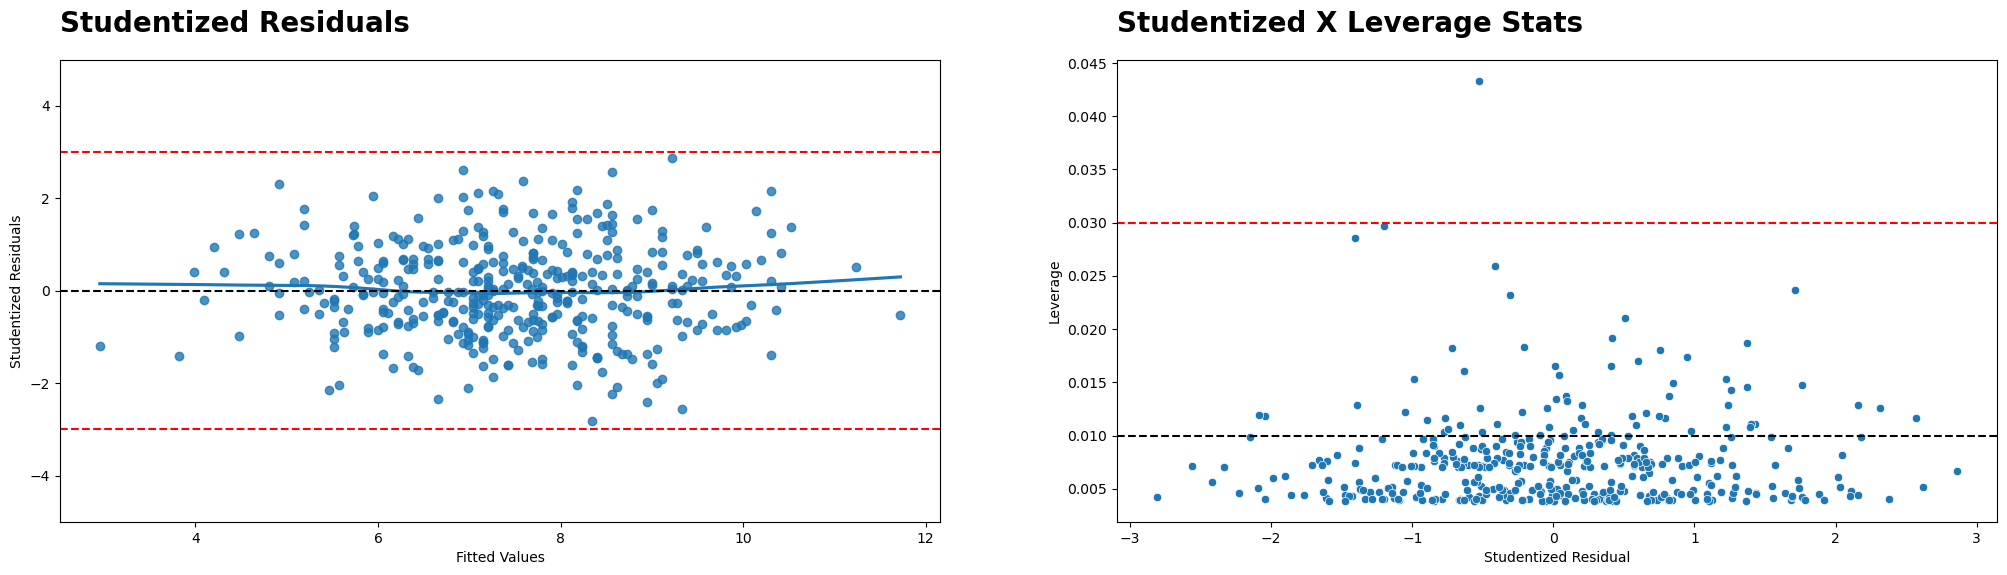

In [74]:
plt.figure(figsize=(25,6))

# Calculating studentized residuals
residuals = results_mlr_carseats_1.resid
resid_mean = residuals.mean()
resid_std = residuals.std()

studentized_residuals = (residuals - resid_mean) / resid_std

# Plotting the residuals X fitted values
ax = plt.subplot(1, 2, 1)
sns.regplot(x = results_mlr_carseats_1.fittedvalues, y = studentized_residuals, lowess=True, ax = ax)
ax.set_title('Studentized Residuals', loc = 'left', size = 20, fontweight = 'bold', pad = 20)

ax.set_xlabel('Fitted Values')
ax.set_ylabel('Studentized Residuals') # Fixed typo in label
ax.axhline(0, c='k', ls='--')
ax.axhline(3, c='r', ls='--')
ax.axhline(-3, c='r', ls='--')
ax.set_ylim(-5, 5)

ax = plt.subplot(1, 2, 2)
infl = results_mlr_carseats_1.get_influence()

# Change this line to use sns.regplot
sns.scatterplot(x = studentized_residuals, y = infl.hat_matrix_diag, ax = ax)

ax.set_title('Studentized X Leverage Stats', loc = 'left', size = 20, fontweight = 'bold', pad = 20)
ax.set_xlabel('Studentized Residual')
ax.set_ylabel('Leverage')
ax.axhline((X.shape[1] + 1) / X.shape[0], c='k', ls='--')
ax.axhline((X.shape[1] + 1) / X.shape[0] * 3, c='r', ls='--')
np.argmax(infl.hat_matrix_diag)


The residuals appear to have a similar variance throughout the different fitted values, indicating homoscedasticity—one of the primary assumptions of linear regression. This pattern suggests that the errors are uniformly distributed and do not show any clear trend or pattern.

In addition to this, we can observe some data points with high leverage. High leverage points are those where the values of the predictor variables (X's) are unusual compared to the rest of the data set. In a multi-dimensional space, these points differ significantly from the overall mean distribution of the X's variables.

However, these high leverage points do not coincide with large residuals, meaning that they do not strongly influence the regression line. Therefore, they are not considered influential points that could harm the model's fit. It's essential to note that high leverage alone does not make a data point influential; it must also have a substantial effect on the regression outcome. In this case, the high leverage points do not seem to adversely affect the model.

#### **Question 11. In this problem we will investigate the t-statistic for the null hypothotesis H0 : β = 0 in simple linear regression without an intercept. To begin, we generate a predictor x and a response y as follows.**
```python
rng = np.random.default_rng(1)
x = rng.normal(size=100)
y = 2 * x + rng.normal(size=100)

In [75]:
rng = np.random.default_rng(1)
x = rng.normal(size=100)
y = 2 * x + rng.normal(size=100)

##### **A)** Perform a simple linear regression of y onto x, without an intercept. Report the coefcient estimate $\hat{β}$, the standard error of this coefcient estimate, and the t-statistic and p-value associated with the null hypothesis H0 : β = 0. Comment on these results. (You can perform regression without an intercept usingt the keywords argument intercept=False to ModelSpec().)

In [76]:
results_slr_carseats_2 = sm.OLS(y, x).fit()

print(results_slr_carseats_2.summary(alpha=0.05))

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.743
Model:                            OLS   Adj. R-squared (uncentered):              0.740
Method:                 Least Squares   F-statistic:                              285.6
Date:                Mon, 28 Aug 2023   Prob (F-statistic):                    6.23e-31
Time:                        10:51:41   Log-Likelihood:                         -141.35
No. Observations:                 100   AIC:                                      284.7
Df Residuals:                      99   BIC:                                      287.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

> Our model estimate an X coeficient of 1.97, a slighty underestimate of the the known true value of 2.0. However, the 95% confidence interval, calculated with using the standard error of $X_1$ and and our chosen significance level, does encompass the true value of the relationship. This indicates that the slight deviation from the true value is within the expected range of statistical variability, and the model's prediction is consistent with the underlying truth.

##### B) Now perform a simple linear regression of x onto y without an intercept, and report the coefcient estimate, its standard error, and the corresponding t-statistic and p-values associated with the null hypothesis H0 : β = 0. Comment on these results.



In [77]:
results_slr_carseats_2 = sm.OLS(x, y).fit()

print(results_slr_carseats_2.summary(alpha=0.05))

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.743
Model:                            OLS   Adj. R-squared (uncentered):              0.740
Method:                 Least Squares   F-statistic:                              285.6
Date:                Mon, 28 Aug 2023   Prob (F-statistic):                    6.23e-31
Time:                        10:51:41   Log-Likelihood:                         -58.349
No. Observations:                 100   AIC:                                      118.7
Df Residuals:                      99   BIC:                                      121.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

> We know that if Y increases 2 times by unit change in X, then X will increase in 0.5 by unit change in Y. The above model estimate an coeficient of 0.3757 for the variable y, a slighty underestimate of the the known true value of 0.5. The SE is 5X lower, the t-statistic remains the same and the p-value indicates that the relation is still significance, but the 95% confidence interval does not emcompass the known true relation of x onto y

##### C) What is the relationship between the results obtained in A) and B)?

> The B) have a lower coefficient and standard error than A), but the proportion remains the same (the coef is 17X the std err), causing both to have the same t-stat and are significant.

#### **Question 12. This problem involves simple linear regression without an intercept.**

##### A) Recall that the coefcient estimate  $\hat{β}$ for the linear regression of Y onto X without an intercept is given by (3.38). Under what circumstance is the coefcient estimate for the regression of X onto Y the same as the coefcient estimate for the regression of Y onto X?

when 

$\sum_{i=1}^{n} x_i = \sum_{i=1}^{n} y_i$

in which case $\hat{β} = 1$

##### B) Generate an example in Python with n = 100 observations in which the coefcient estimate for the regression of X onto Y *is diferent from* the coefcient estimate for the regression of Y onto X.

<AxesSubplot:>

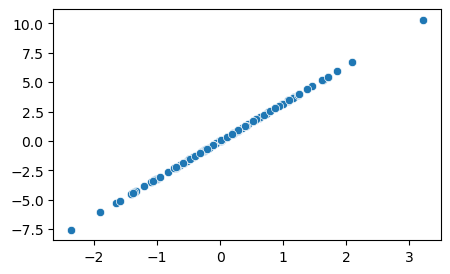

In [78]:
x = np.random.normal(size=100)
y = x*3.2

plt.figure(figsize=(5,3))
sns.scatterplot(x=x, y=y)

In [79]:
model_a = sm.OLS(y, x).fit()
model_b = sm.OLS(x, y).fit()

print(f'Coef x: {model_a.params[0].round(2)}')
print(f'Coef y: {model_b.params[0].round(2)}')

Coef x: 3.2
Coef y: 0.31


##### C) Generate an example in Python with n = 100 observations in which the coefcient estimate for the regression of X onto Y *is the same as* the coefcient estimate for the regression of Y onto X.

<AxesSubplot:>

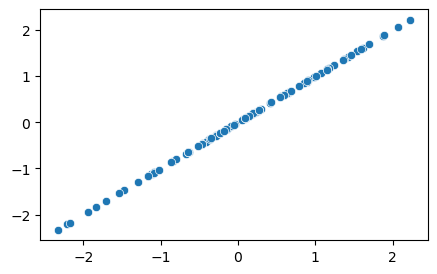

In [80]:
x = np.random.normal(size=100)
y = x

plt.figure(figsize=(5,3))
sns.scatterplot(x=x, y=y)

In [81]:
model_a = sm.OLS(y, x).fit()
model_b = sm.OLS(x, y).fit()

print(f'Coef x: {model_a.params[0].round(2)}')
print(f'Coef y: {model_b.params[0].round(2)}')

Coef x: 1.0
Coef y: 1.0


#### **Question 13.  In this exercise you will create some simulated data and will fit simple linear regression models to it. Make sure to use the default random number generator with seed set to 1 prior to starting part (a) to ensure consistent results.**

In [82]:
np.random.seed(1)

A) Using the normal() method of your random number generator, create a vector, x, containing 100 observations drawn from a N(0, 1) distribution. This represents a feature, X.


In [83]:
mu, sigma = 0, 1
x = np.random.normal(mu, sigma, 100)

B) Using the normal() method, create a vector, eps, containing 100 observations drawn from a N(0, 0.25) distribution—a normal distribution with mean zero and variance 0.25.


In [84]:
mu, sigma = 0, 0.25
eps = np.random.normal(mu, sigma, 100)

C) Using x and eps, generate a vector y according to the model Y = −1 + 0.5X + ε. What is the length of the vector y? What are the values of β0 and β1 in this linear model?


In [85]:
y = -1 + 0.5*x + eps
len(y)

100

> - β0  = -1
> - β1  = 0.05

D) Create a scatterplot displaying the relationship between x and y. Comment on what you observe.


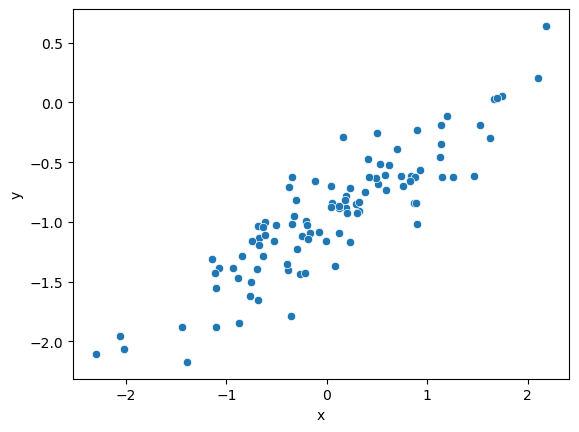

In [86]:
sns.scatterplot(x=x, y = y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

> X and Y seems to be correlated

E) Fit a least squares linear model to predict y using x. Comment on the model obtained. How do $\hat{β_0}$ and $\hat{β_1}$ compare to β0 and β1?


In [87]:
X = sm.add_constant(x)  # Adding a constant (intercept) to the model
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     391.4
Date:                Mon, 28 Aug 2023   Prob (F-statistic):           5.39e-36
Time:                        10:51:42   Log-Likelihood:                 4.1908
No. Observations:                 100   AIC:                            -4.382
Df Residuals:                      98   BIC:                            0.8288
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9632      0.023    -40.999      0.0

> - $\hat{β_0}$ = -0.9632
> - $\hat{β_1}$ =  0.05239

> The $\hat{β_0}$ is being underestimated and $\hat{β_1}$ is being overestimated.

f) Display the least squares line on the scatterplot obtained in (d). Draw the population regression line on the plot, in a different color. Use the legend() method of the axes to create an appropriate legend.


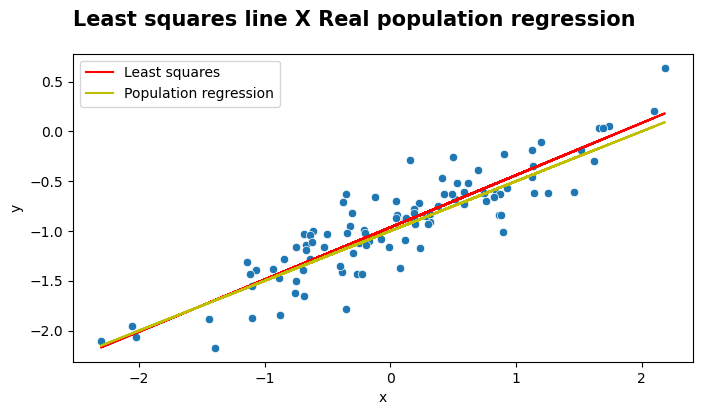

In [88]:
plt.figure(figsize=(8,4))
ax = sns.scatterplot(x=x, y=y)
plt.title('Least squares line X Real population regression', loc='left', pad=20, fontweight='bold', size=15)
plt.xlabel('x')
plt.ylabel('y')
ax.plot(x, model.predict(), color='r', label='Least squares')
ax.plot(x, -1+(0.5*x), color='y', label='Population regression')
ax.legend()
plt.show()

> ax.plot()

G) Now fit a polynomial regression model that predicts y using x and x^2. Is there evidence that the quadratic term improves the model fit? Explain your answer.


In [89]:
X_df = pd.DataFrame(X).rename(columns={1:"x"}).drop(columns = 0)
X_df

,x
0,1.624345
1,-0.611756
2,-0.528172
3,-1.072969
4,0.865408
...,...
95,0.077340
96,-0.343854
97,0.043597
98,-0.620001


In [90]:
X_poli = MS([
    poly('x', degree=2, 
        raw=True
        )]).fit_transform(X_df)

polinomial_model = sm.OLS(y, X_poli).fit()
print(polinomial_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     193.8
Date:                Mon, 28 Aug 2023   Prob (F-statistic):           1.32e-34
Time:                        10:51:42   Log-Likelihood:                 4.2077
No. Observations:                 100   AIC:                            -2.415
Df Residuals:                      97   BIC:                             5.400
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
intercept   

> The model explainability ($R^2$) remained unchanged after adding the quadratic term. However the f-stat decreased and our p-value increased consequently. A lower F-statistic indicates that the quadratic term may have been detrimental to the model. Specifically, the ratio of explained variance to unexplained variance has decreased, meaning that the quadratic term did not contribute additional useful information. Instead, it appears to have added unnecessary complexity to the model. This suspicion is supported by the high p-value associated with the quadratic term, which suggests that this term is not statistically significant. 

H) Repeat (a)–(f) after modifying the data generation process in such a way that there is less noise in the data. The model should remain the same. You can do this by decreasing the variance of the normal distribution used to generate the error term ε in (b). Describe your results.


In [91]:
np.random.seed(1)
mu, sigma = 0, 1
x = np.random.normal(mu, sigma, 100)
mu, sigma = 0, 0.1
eps = np.random.normal(mu, sigma, 100)

y = -1 + 0.5*x + eps

X = sm.add_constant(x)

new_model = sm.OLS(y, X).fit()

print(new_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     2314.
Date:                Mon, 28 Aug 2023   Prob (F-statistic):           5.58e-70
Time:                        10:51:42   Log-Likelihood:                 95.820
No. Observations:                 100   AIC:                            -187.6
Df Residuals:                      98   BIC:                            -182.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9853      0.009   -104.844      0.0

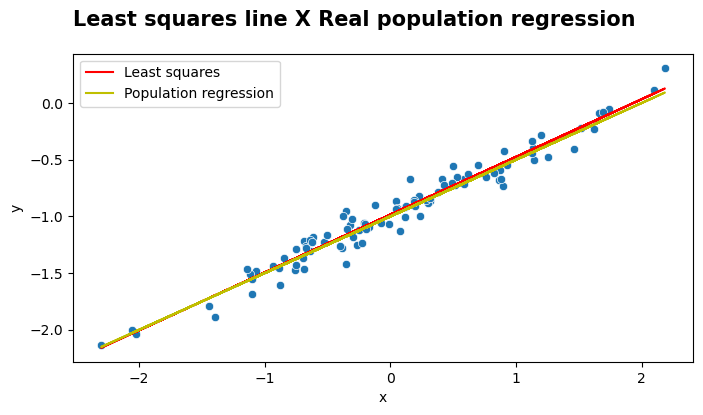

In [92]:
plt.figure(figsize=(8,4))
ax = sns.scatterplot(x=x, y=y)
plt.title('Least squares line X Real population regression', loc='left', pad=20, fontweight='bold', size=15)
plt.xlabel('x')
plt.ylabel('y')
ax.plot(x, new_model.predict(), color='r', label='Least squares')
ax.plot(x, -1+(0.5*x), color='y', label='Population regression')
ax.legend()
plt.show()

> By decreasing the variance in the error term (eps), both coefficients achieved closer values to the true known coefficients and lower standard errors, which consequently lead to even higher absolute t-stat and even lower p-values. The $R^2$ increased as well, demonstrating that the independent variable (x), now, explains more of the variablity in the dependent variable(y) than before. In addition, we can also visualize that the least square line is closer to the true regression line.

> - $\hat{β_0}before$ = -0.9632 --> $\hat{β_0}after$ = -0.9853
> - $\hat{β_1}before$ =  0.05239 --> $\hat{β_1}after$ =  0.5095

I) Repeat (a)–(f) after modifying the data generation process in such a way that there is more noise in the data. The model (3.39) should remain the same. You can do this by increasing the variance of the normal distribution used to generate the error term ε in (b). Describe your results.


In [93]:
np.random.seed(1)
mu, sigma = 0, 1
x = np.random.normal(mu, sigma, 100)
mu, sigma = 0, 0.9
eps = np.random.normal(mu, sigma, 100)

y = -1 + 0.5*x + eps

X = sm.add_constant(x)

new_model_1 = sm.OLS(y, X).fit()

print(new_model_1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.278
Model:                            OLS   Adj. R-squared:                  0.271
Method:                 Least Squares   F-statistic:                     37.77
Date:                Mon, 28 Aug 2023   Prob (F-statistic):           1.72e-08
Time:                        10:51:42   Log-Likelihood:                -123.90
No. Observations:                 100   AIC:                             251.8
Df Residuals:                      98   BIC:                             257.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.8677      0.085    -10.259      0.0

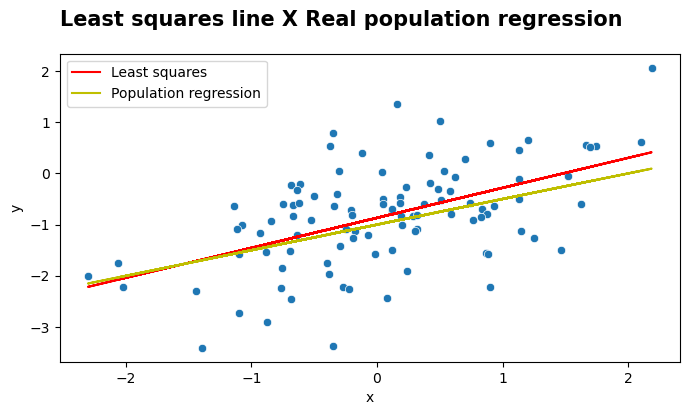

In [94]:
plt.figure(figsize=(8,4))
ax = sns.scatterplot(x=x, y=y)
plt.title('Least squares line X Real population regression', loc='left', pad=20, fontweight='bold', size=15)
plt.xlabel('x')
plt.ylabel('y')
ax.plot(x, new_model_1.predict(), color='r', label='Least squares')
ax.plot(x, -1+(0.5*x), color='y', label='Population regression')
ax.legend()
plt.show()

> The opposite of what happened with the lower error variance model occurred. By increasing the variance in the error term (eps), the coefficients diverged further from the true known values and had higher standard errors. This consequently led to lower absolute t-statistics and higher p-values. The $R^2$ decreased as well, demonstrating that the independent variable (x), now, explains less of the variablity in the dependent variable(y) than before. In addition, we can also visualize that the least square line is further from the true regression line.

> - $\hat{β_0}before$ = -0.9632 --> $\hat{β_0}after$ = -0.8677
> - $\hat{β_1}before$ =  0.05239 --> $\hat{β_1}after$ =  0.5859

J) What are the confidence intervals for β0 and β1 based on the original data set, the noisier data set, and the less noisy data set? Comment on your results.


<Figure size 640x480 with 0 Axes>

<Figure size 1500x400 with 0 Axes>

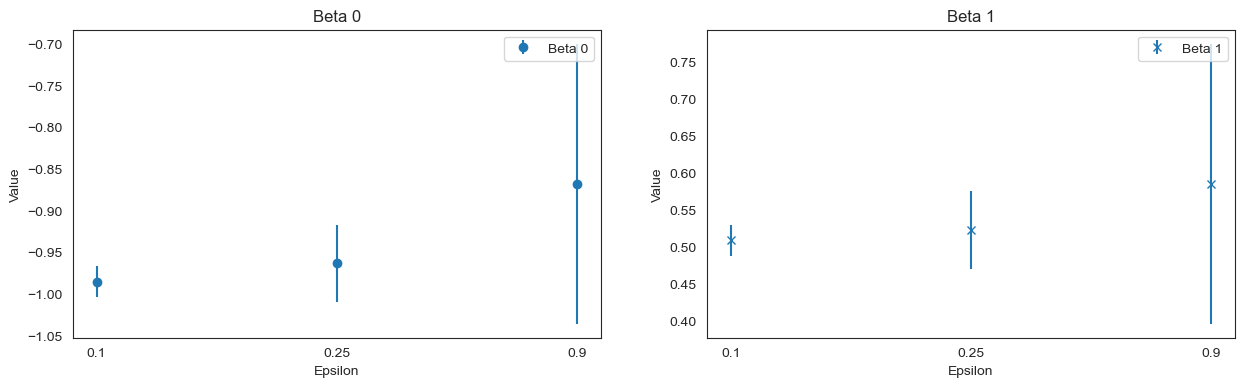

In [95]:
sns.set_style("white")  # Set the plot background to white

plt.suptitle('Confidence Intetval for coefficients β0 and β1', fontsize=35, fontweight='bold', x = 0.46, y =1)
plt.figure(figsize=(15,4))

fig, axes = plt.subplots(1, 2, figsize=[15, 4])

# Beta 0
axes[0].errorbar(['0.1', '0.25', '0.9'],
                 [new_model.params[0], model.params[0], new_model_1.params[0]],
                 yerr=[new_model.conf_int()[0][1] - new_model.params[0],
                       model.conf_int()[0][1] - model.params[0],
                       new_model_1.conf_int()[0][1] - new_model_1.params[0]],
                 fmt='o', label='Beta 0')
axes[0].set_title('Beta 0')
axes[0].set_xlabel('Epsilon')
axes[0].set_ylabel('Value')
axes[0].legend()

# Beta 1
axes[1].errorbar(['0.1', '0.25', '0.9'],
                 [new_model.params[1], model.params[1], new_model_1.params[1]],
                 yerr=[new_model.conf_int()[1][1] - new_model.params[1],
                       model.conf_int()[1][1] - model.params[1],
                       new_model_1.conf_int()[1][1] - new_model_1.params[1]],
                 fmt='x', label='Beta 1')
axes[1].set_title('Beta 1')
axes[1].set_xlabel('Epsilon')
axes[1].set_ylabel('Value')
axes[1].legend()

plt.show()

> In the less noisy data set, the confidence intervals for β0 and β1 encompassed a narrower range of values. With less noise, the standard error was reduced, resulting in a more precise confidence interval. Conversely, as the noise level increased, the confidence intervals also expanded. This widening of the intervals reflects the additional uncertainty introduced by the greater standard error, accommodating the increased variability in the data.

#### **Question 14. This problem focuses on the collinearity problem**

##### **A)** Perform the following commands in Python:
```python
rng = np.random.default_rng(10)
x1 = rng.uniform(0, 1, size=100)
x2 = 0.5 * x1 + rng.normal(size=100) / 10
y = 2 + 2 * x1 + 0.3 * x2 + rng.normal(size=100)
```


The last line corresponds to creating a linear model in which y is a function of x1 and x2. Write out the form of the linear model. What are the regression coefcients?

In [96]:
rng = np.random.default_rng(10)
x1 = rng.uniform(0, 1, size=100)
x2 = 0.5 * x1 + rng.normal(size=100) / 10
y = 2 + 2 * x1 + 0.3 * x2 + rng.normal(size=100)

> The coeficients are:
> - ${β_0}$ = 2
> - ${β_1}$ = 2
> - ${β_2}$ = 0.3

**B)** What is the correlation between x1 and x2? Create a scatterplot displaying the relationship between the variables.


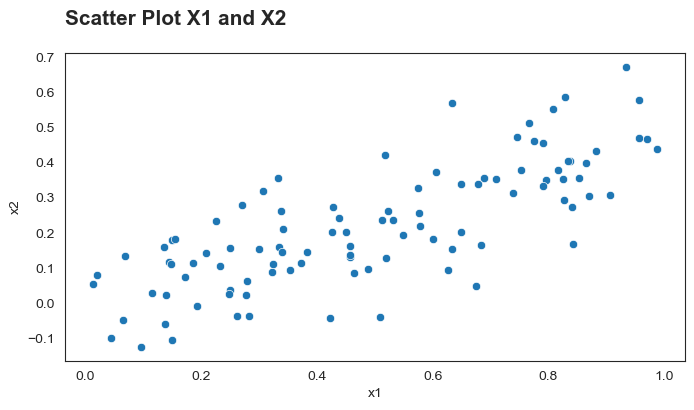

In [97]:
plt.figure(figsize=(8,4))

sns.scatterplot(x= x1,y = x2)

plt.title('Scatter Plot X1 and X2', loc='left', pad=20, fontweight='bold', size=15)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

> $X_1$ and $X_2$ are positively correlated

**C)** Using this data, fit a least squares regression to predict y using x1 and x2. Describe the results obtained. What are \( $\hat{\beta_0}$ \), \( $\hat{\beta_1}$ \), and \( $\hat{\beta_2}$ \)? How do these relate to the true \( $\beta_0$ \), \( $\beta_1$ \), and \( $\beta_2$ \)? Can you reject the null hypothesis \( $H_0$: $\beta_1$ = 0 \)? How about the null hypothesis \( $H_0$: $\beta_2$ = 0 \)?


In [98]:
df_14 = pd.DataFrame(data = {'x1':x1, 'x2' : x2, 'y': y})

X = MS(['x1', 'x2']).fit_transform(df_14)


model_14 = sm.OLS(y, X).fit()

print(model_14.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     19.89
Date:                Mon, 28 Aug 2023   Prob (F-statistic):           5.76e-08
Time:                        10:51:43   Log-Likelihood:                -130.62
No. Observations:                 100   AIC:                             267.2
Df Residuals:                      97   BIC:                             275.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.9579      0.190     10.319      0.0

> The predicted coeficients are:
> - $\hat{\beta_0}$ = 1.95
> - $\hat{\beta_1}$ = 1.61
> - $\hat{\beta_2}$ = 0.942


> The intercep is close to its true value 2. \beta_1 is also relatively near its true value 2, but the \beta_2 is far from its true value 0.3.

> - We **can** reject the $H_0$ for ${β_1}$, but we **cannot** reject not for ${β_2}$

**D)** Now fit a least squares regression to predict y using only x1. Comment on your results. Can you reject the null hypothesis \( $H_0$: $\beta_1$ = 0 \)?


In [99]:
df_14 = pd.DataFrame(data = {'x1':x1, 'y': y})

X = MS(['x1']).fit_transform(df_14)


model_14 = sm.OLS(y, X).fit()

print(model_14.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     38.39
Date:                Mon, 28 Aug 2023   Prob (F-statistic):           1.37e-08
Time:                        10:51:43   Log-Likelihood:                -131.28
No. Observations:                 100   AIC:                             266.6
Df Residuals:                      98   BIC:                             271.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.9371      0.189     10.242      0.0

> The $R_2$ decreased from 2.92 to 2.82, which means that the removed variable, x2 variable, was not explaining the variablity in Y. In addition, the $\hat{\beta_1}$ got even closer to true value of $\beta_1$, inceasing the t-stat and decreasing the p_value.

**E)** Now fit a least squares regression to predict y using only x2. Comment on your results. Can you reject the null hypothesis \( H_0: \beta_1 = 0 \)?


In [100]:
df_14 = pd.DataFrame(data = {'x2':x2, 'y': y})

X = MS(['x2']).fit_transform(df_14)


model_14 = sm.OLS(y, X).fit()

print(model_14.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     27.99
Date:                Mon, 28 Aug 2023   Prob (F-statistic):           7.43e-07
Time:                        10:51:43   Log-Likelihood:                -135.24
No. Observations:                 100   AIC:                             274.5
Df Residuals:                      98   BIC:                             279.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.3239      0.154     15.124      0.0

> The $R_2$ decreased from 2.92 to 2.22, more than the $R_2$ from the model using only x1, which means that x1, explains more of the variablity in Y than x2 comparatively. In addition, the $\hat{\beta_2}$ was overestimated, but the p_value was significant. Meaning that we can reject the null hypothesis $H_0$ :$\beta_1$ =0.

**F)** Do the results obtained in (c)–(e) contradict each other? Explain your answer.


> Yes they contradict each other. In *C* we have that the coefficient for x2 is not significant, while in a simple linear regression in *E* the coefficient for x2 was significant. That happened because of the multicolinearity between x1 and x2 (viasualize in *B*), which in turn increases the p-values and causes us to incorrectly accept the null hypothesis $H_0$:$ \beta_2$=0 when our model uses both features.

**G)** Suppose we obtain one additional observation, which was unfortunately mismeasured. We use the function `np.concatenate()` to add this additional observation to each of x1, x2, and y. 
```python
x1 = np.concatenate([x1, [0.1]])
x2 = np.concatenate([x2, [0.8]])
y = np.concatenate([y, [6]])
```

Re-ft the linear models from *C* to *E* using this new data. What efect does this new observation have on the each of the models? In each model, is this observation an outlier? A high-leverage point? Both? Explain your answers.

In [101]:
x1 = np.concatenate([x1, [0.1]])
x2 = np.concatenate([x2, [0.8]])
y = np.concatenate([y, [6]])

In [102]:
df_14 = pd.DataFrame(data = {'x1' : x1, 'x2':x2, 'y': y})

# model C
X = MS(['x1', 'x2']).fit_transform(df_14)
model_14_c = sm.OLS(y, X).fit()
# model D
X = MS(['x1']).fit_transform(df_14)
model_14_d = sm.OLS(y, X).fit()
# model E
X = MS(['x2']).fit_transform(df_14)
model_14_e = sm.OLS(y, X).fit()

In [103]:
model_14_c.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.277
Method:                 Least Squares   F-statistic:                     20.17
Date:                Mon, 28 Aug 2023   Prob (F-statistic):           4.60e-08
Time:                        10:51:43   Log-Likelihood:                -135.30
No. Observations:                 101   AIC:                             276.6
Df Residuals:                      98   BIC:                             284.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.0618      0.192     10.720      0.000       1.680       2.443
x1             0.8575      0.466      1.838      0.069      -0.068       1.783
x2             2.2663      0.705      3.216      0.002       0.868       3.665
==============================================================================
Omnibus:                        0.139   Durbin-Watson:                   1.894
Prob(Omnibus):                  0.933   Jarque-Bera (JB):                0.320
Skew:                           0.013   Prob(JB):                        0.852
Kurtosis:                       2.725   Cond. No.                         9.68
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [104]:
model_14_d.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.217
Model:                            OLS   Adj. R-squared:                  0.209
Method:                 Least Squares   F-statistic:                     27.42
Date:                Mon, 28 Aug 2023   Prob (F-statistic):           9.23e-07
Time:                        10:51:43   Log-Likelihood:                -140.37
No. Observations:                 101   AIC:                             284.7
Df Residuals:                      99   BIC:                             290.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.0739      0.201     10.310      0.000       1.675       2.473
x1             1.8760      0.358      5.236      0.000       1.165       2.587
==============================================================================
Omnibus:                        8.232   Durbin-Watson:                   1.636
Prob(Omnibus):                  0.016   Jarque-Bera (JB):               10.781
Skew:                           0.396   Prob(JB):                      0.00456
Kurtosis:                       4.391   Cond. No.                         4.61
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [105]:
model_14_e.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.267
Model:                            OLS   Adj. R-squared:                  0.260
Method:                 Least Squares   F-statistic:                     36.10
Date:                Mon, 28 Aug 2023   Prob (F-statistic):           3.13e-08
Time:                        10:51:43   Log-Likelihood:                -137.01
No. Observations:                 101   AIC:                             278.0
Df Residuals:                      99   BIC:                             283.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.2840      0.151     15.088      0.000       1.984       2.584
x2             3.1458      0.524      6.008      0.000       2.107       4.185
==============================================================================
Omnibus:                        0.495   Durbin-Watson:                   1.939
Prob(Omnibus):                  0.781   Jarque-Bera (JB):                0.631
Skew:                          -0.041   Prob(JB):                        0.729
Kurtosis:                       2.621   Cond. No.                         5.84
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [106]:
def regression_plot(x_variables: list, y_variable: str, df: pd.DataFrame):

    X = MS(x_variables).fit_transform(df)
    y = df[y_variable]
    model = sm.OLS(y, X).fit()

    # Calculating residuals, standardized residuals and leverage stastistics
    resid = model.resid
    std_scaler = StandardScaler()
    studentized_residuals = std_scaler.fit_transform(resid.values.reshape(-1, 1)).ravel()
    sqrt_studentized_residuals = np.sqrt(studentized_residuals)
    infl = model.get_influence()

    # Plotting the graphs
    fig, axes = plt.subplots(2, 2, figsize=(15, 8))

    plt.suptitle('Linear Regression Plots: Outliers, high colinearity', fontsize=25, fontweight='bold', x = 0.44, y = 1.06)
    plt.subplots_adjust(hspace=0.5)

    # Box Plot
    sns.boxplot(x=df_14['y'], orient='h', ax=axes[0,0])
    axes[0,0].set_title('Box Plot for y variable', loc = 'left', size = 15, fontweight = 'bold', pad = 20)
    axes[0,0].set_xlabel('y')

    # Resdiual Plot by fitted value
    sns.regplot(x= model.fittedvalues,y = studentized_residuals, ax=axes[0,1])
    axes[0,1].set_title('Residual plot for Regression', loc = 'left', size = 15, fontweight = 'bold', pad = 20)
    axes[0,1].set_xlabel('Fitted value')
    axes[0,1].set_ylabel('Studentized Residual')
    axes[0,1].axhline(-3, c='r', ls='--')
    axes[0,1].axhline(3, c='r', ls='--')

    # High leverage statistics plot
    sns.scatterplot(x = studentized_residuals, y = infl.hat_matrix_diag, ax=axes[1,0])
    axes[1,0].set_title('Studentized Residuals X Leverage Statistic', loc = 'left', size = 15, fontweight = 'bold', pad = 20)
    axes[1,0].set_xlabel('Studentized Residual')
    axes[1,0].set_ylabel('Leverage')
    axes[1,0].axhline((X.shape[1] + 1) / X.shape[0], c='k', ls='--')
    axes[1,0].axhline((X.shape[1] + 1) / X.shape[0] * 3, c='r', ls='--')

    plt.show()
    print(f'The index of the point with the highest leverage statistics is: {np.argmax(infl.hat_matrix_diag)}')
    return

C:\Users\ferna\AppData\Local\Temp\ipykernel_41036\1933842157.py:11: RuntimeWarning: invalid value encountered in sqrt
  sqrt_studentized_residuals = np.sqrt(studentized_residuals)


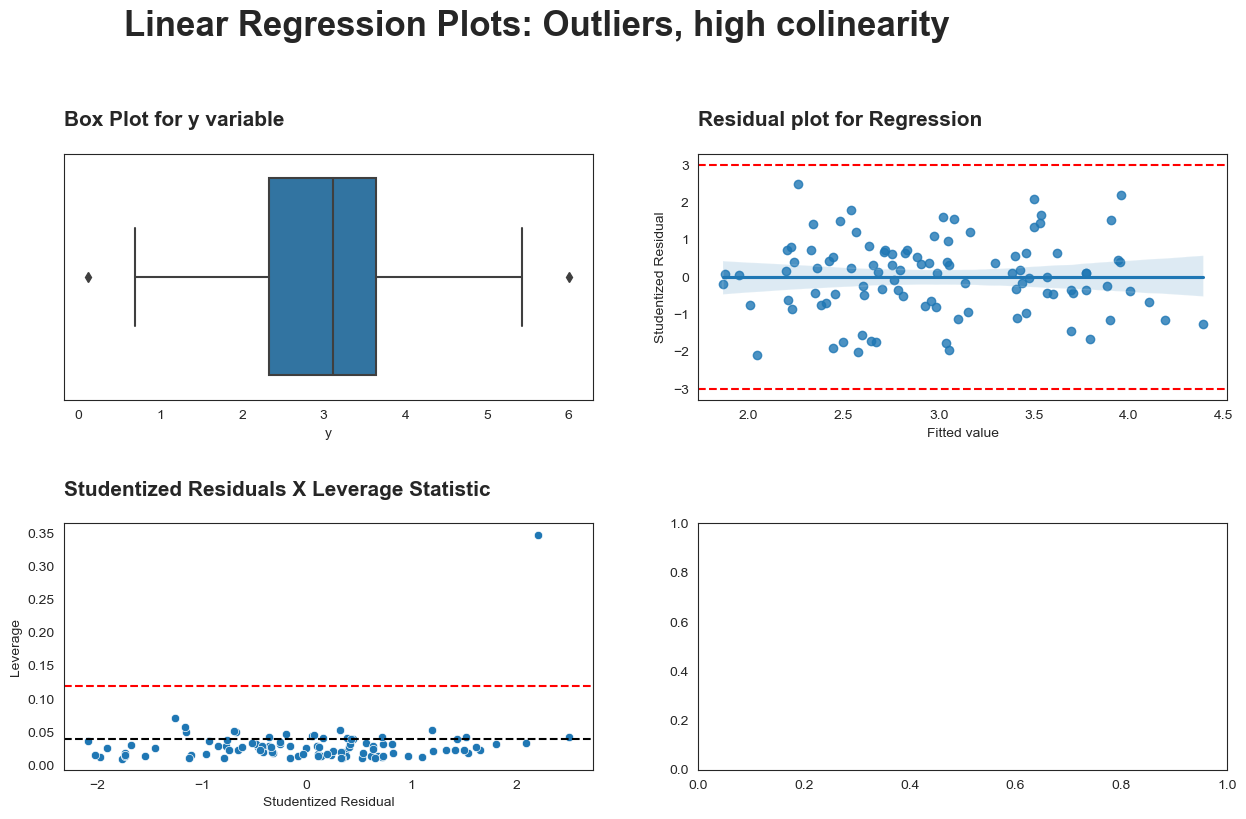

The index of the point with the highest leverage statistics is: 100


In [107]:
# Model C diagnosis
regression_plot(['x1', 'x2'], 'y', df_14)

C:\Users\ferna\AppData\Local\Temp\ipykernel_41036\1933842157.py:11: RuntimeWarning: invalid value encountered in sqrt
  sqrt_studentized_residuals = np.sqrt(studentized_residuals)


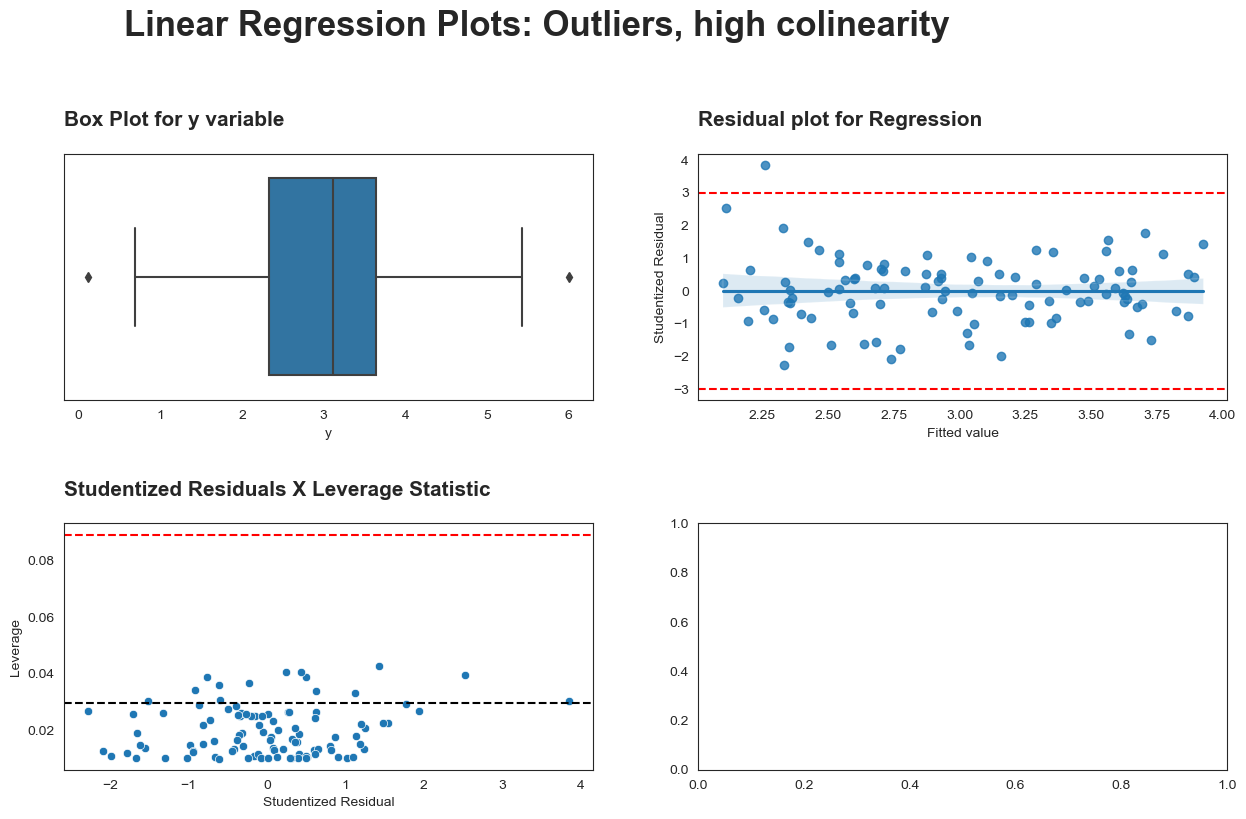

The index of the point with the highest leverage statistics is: 52


In [108]:
# Model d diagnosis
regression_plot(['x1'], 'y', df_14)

C:\Users\ferna\AppData\Local\Temp\ipykernel_41036\1933842157.py:11: RuntimeWarning: invalid value encountered in sqrt
  sqrt_studentized_residuals = np.sqrt(studentized_residuals)


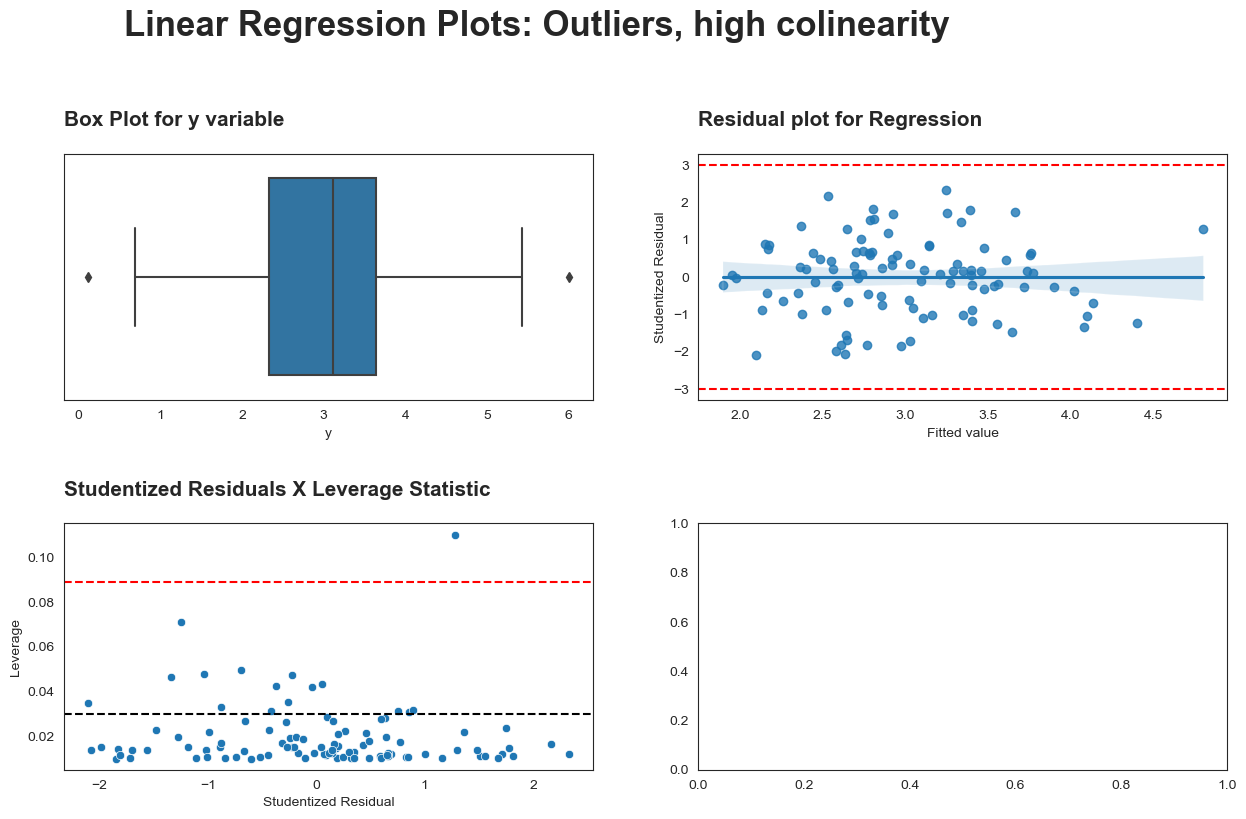

The index of the point with the highest leverage statistics is: 100


In [109]:
# Model e diagnosis
regression_plot(['x2'], 'y', df_14)

> In the model C the observation is both an outlier and an high leverage point as we can see in the boxplot of the y variable and the leverage statistics plot

> In the model D the observation is only an outlier the boxplot of the y variable

> In the model E the observation is both an outlier and an silghty high leverage point as we can see in the boxplot of the y variable and the leverage statistics plot

### **Question 15. This problem involves the Boston data set, which we saw in the lab for this chapter. We will now try to predict the per capita crime rate using the other variables in this data set. In other words, per capita crime rate is the response, and the other variables are the predictors.**



##### **A)** Simple Linear Regression for Each Predictor

For each predictor, fit a simple linear regression model to predict the response. Describe your results. In which of the models is there a statistically significant association between the predictor and the response? Create some plots to back up your assertions.



In [110]:
Boston = load_data("Boston")
Boston.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat', 'medv'],
      dtype='object')

In [153]:
def fit_simple_linear_regression(x_feature, target_feature, dataframe):
    X = dataframe[[x_feature]]
    X = sm.add_constant(X)
    y = dataframe[target_feature]
    model = sm.OLS(y, X).fit()
    return model

In [207]:
x_columns = Boston.columns.drop(['crim'])

models_a = [fit_simple_linear_regression(col, 'crim', Boston) for col in x_columns]

p_values = []
for model in models_a:
    p_value = model.pvalues

    p_values.append({
        'intercept' : p_value[0],
        'p_value' : p_value[1]
        })

In [208]:
pvalues_model_15 = pd.DataFrame(p_values, index = x_columns)
pvalues_model_15['statistical significant'] = pvalues_model_15['p_value'] < 0.05
pvalues_model_15['p_value'] = pvalues_model_15['p_value'].apply(lambda x: f'{x:.6f}')
pvalues_model_15

,intercept,p_value,statistical significant
zn,4.037668e-24,0.000006,True
indus,2.091266e-03,0.000000,True
chas,1.239505e-19,0.209435,False
nox,5.076814e-15,0.000000,True
rm,2.272000e-09,0.000001,True
age,7.221718e-05,0.000000,True
dis,1.502748e-33,0.000000,True
rad,3.605846e-07,0.000000,True
tax,2.773600e-23,0.000000,True
ptratio,3.395255e-08,0.000000,True


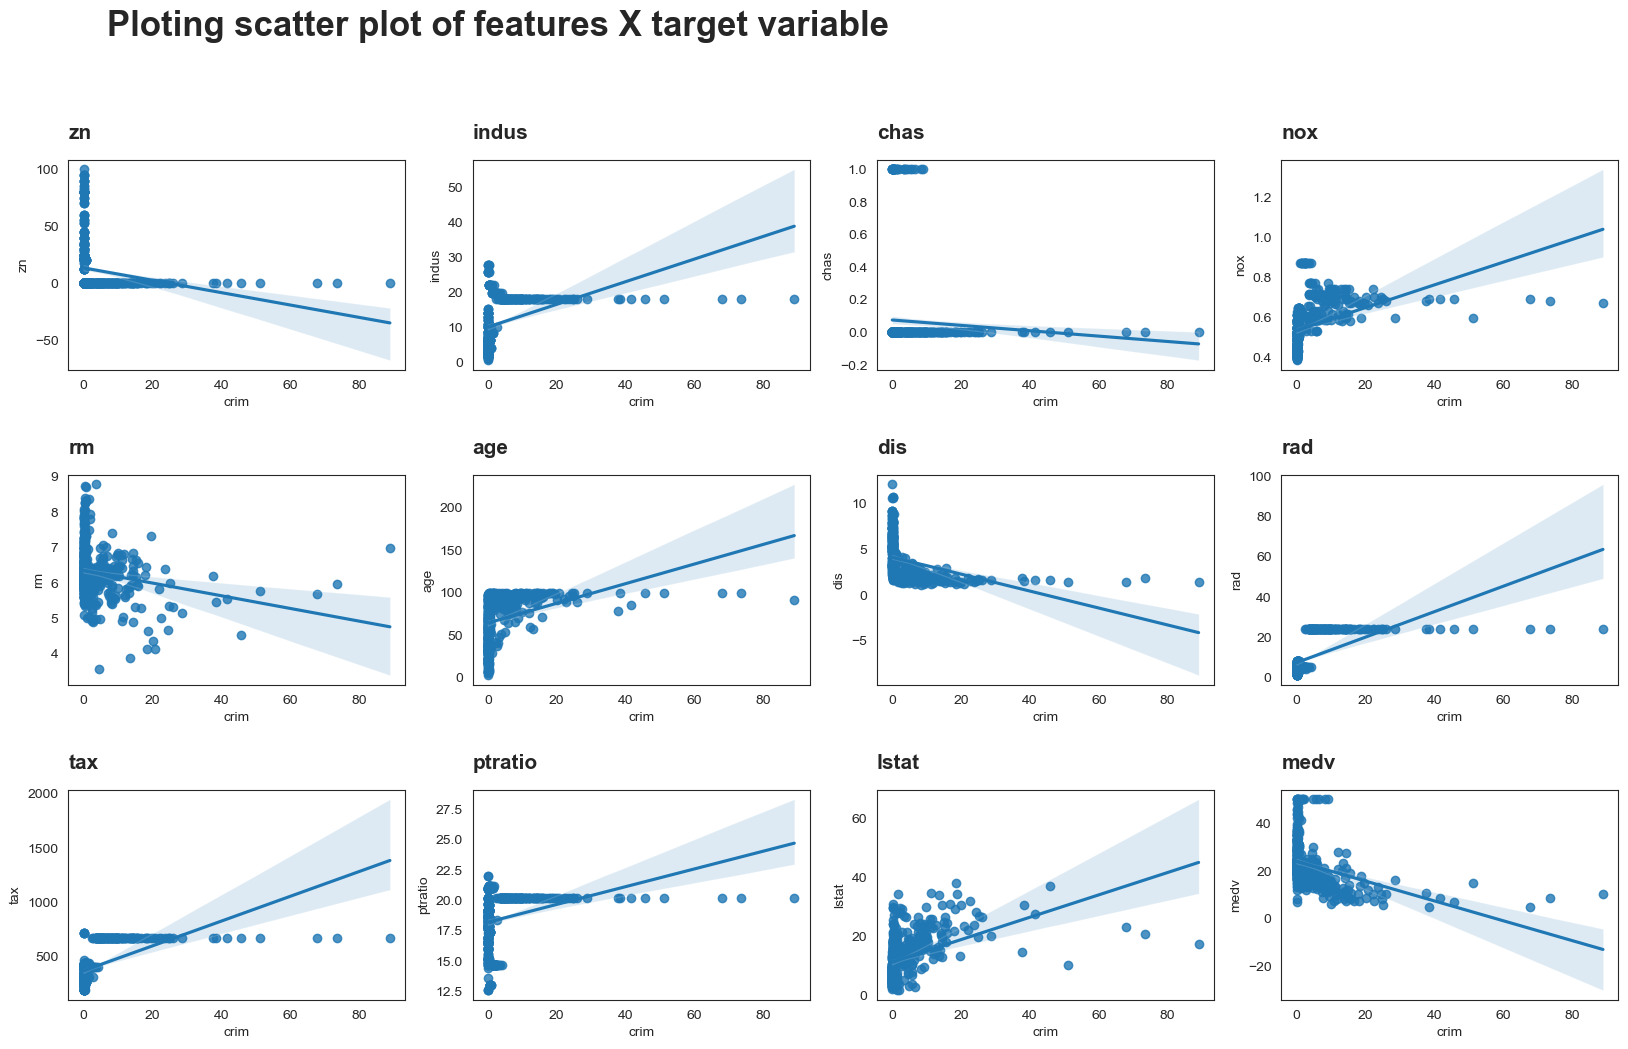

In [114]:
plt.figure(figsize=(20,15))
plt.suptitle('Ploting scatter plot of features X target variable', fontsize=25, fontweight='bold', x = 0.34, y = 0.98)
plt.subplots_adjust(hspace=0.5)

for n, col in enumerate(x_columns):
    ax = plt.subplot(4, 4, n+1)
    sns.regplot(x='crim', y=col, data=Boston, ax=ax)
    plt.title(f'{col}', size=15, fontweight='bold', loc='left', pad=15)
    plt.xlabel('crim')
    plt.ylabel(col)
    
plt.show()

> All columns except one, that is chas, had an statistial significantly association. We can observe that looking at the scatter plots and p_value df

##### **B)** Fit a multiple regression model to predict the response using all of the predictors. Describe your results. For which predictors can we reject the null hypothesis \( H_0 : \beta_j = 0 \)?



In [115]:
def fit_multi_linear_regression(X, y, df):
    X = MS(X).fit_transform(df)
    y = df[y]

    slr_model = sm.OLS(y, X).fit()
    return slr_model

In [130]:
X = Boston.columns.drop(['crim'])

model_15_b = fit_multi_linear_regression(X, 'crim', Boston)

print(model_15_b.summary())

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.449
Model:                            OLS   Adj. R-squared:                  0.436
Method:                 Least Squares   F-statistic:                     33.52
Date:                Mon, 28 Aug 2023   Prob (F-statistic):           2.03e-56
Time:                        10:59:15   Log-Likelihood:                -1655.4
No. Observations:                 506   AIC:                             3337.
Df Residuals:                     493   BIC:                             3392.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     13.7784      7.082      1.946      0.0

In [172]:
pvalues_dict = model_15_b.pvalues.to_dict()
pvalues_model_15_b = pd.DataFrame({'p_value': pvalues_dict.values()}, index=pvalues_dict.keys())
pvalues_model_15_b['Reject H0'] = pvalues_model_15_b['p_value'] < 0.05
pvalues_model_15_b['p_value'] = pvalues_model_15_b['p_value'].apply(lambda x: f'{x:.6f}')
pvalues_model_15_b

,p_value,Reject H0
intercept,0.052271,False
zn,0.015344,True
indus,0.485709,False
chas,0.485841,False
nox,0.060370,False
rm,0.300738,False
age,0.962323,False
dis,0.000373,True
rad,0.000000,True
tax,0.465757,False


In [147]:
pvalues_df[pvalues_df['Reject H0']==True].index

Index(['zn', 'dis', 'rad', 'medv'], dtype='object')

> We can reject the $H_0$ for the following predictors: ['zn', 'dis', 'rad', 'medv']


##### **C)** How do your results from (A) compare to your results from (B)? Create a plot displaying the univariate regression coefficients from (A) on the x-axis, and the multiple regression coefficients from (B) on the y-axis. That is, each predictor is displayed as a single point in the plot. Its coefficient in a simple linear regression model is shown on the x-axis, and its coefficient estimate in the multiple linear regression model is shown on the y-axis.


In [213]:
multivariate_params

array([], dtype=float64)

In [212]:
univariate_params

zn         -0.073935
indus       0.509776
chas       -1.892777
nox        31.248531
rm         -2.684051
age         0.107786
dis        -1.550902
rad         0.617911
tax         0.029742
ptratio     1.151983
lstat       0.548805
medv       -0.363160
dtype: float64

In [214]:
univariate_params = pd.concat([m.params[1:] for m in models_a])
multivariate_params = model_15_b.params[1:]
df = pd.DataFrame({'Univariate_coef': univariate_params, 
                   'Multivariate_coef': multivariate_params,})

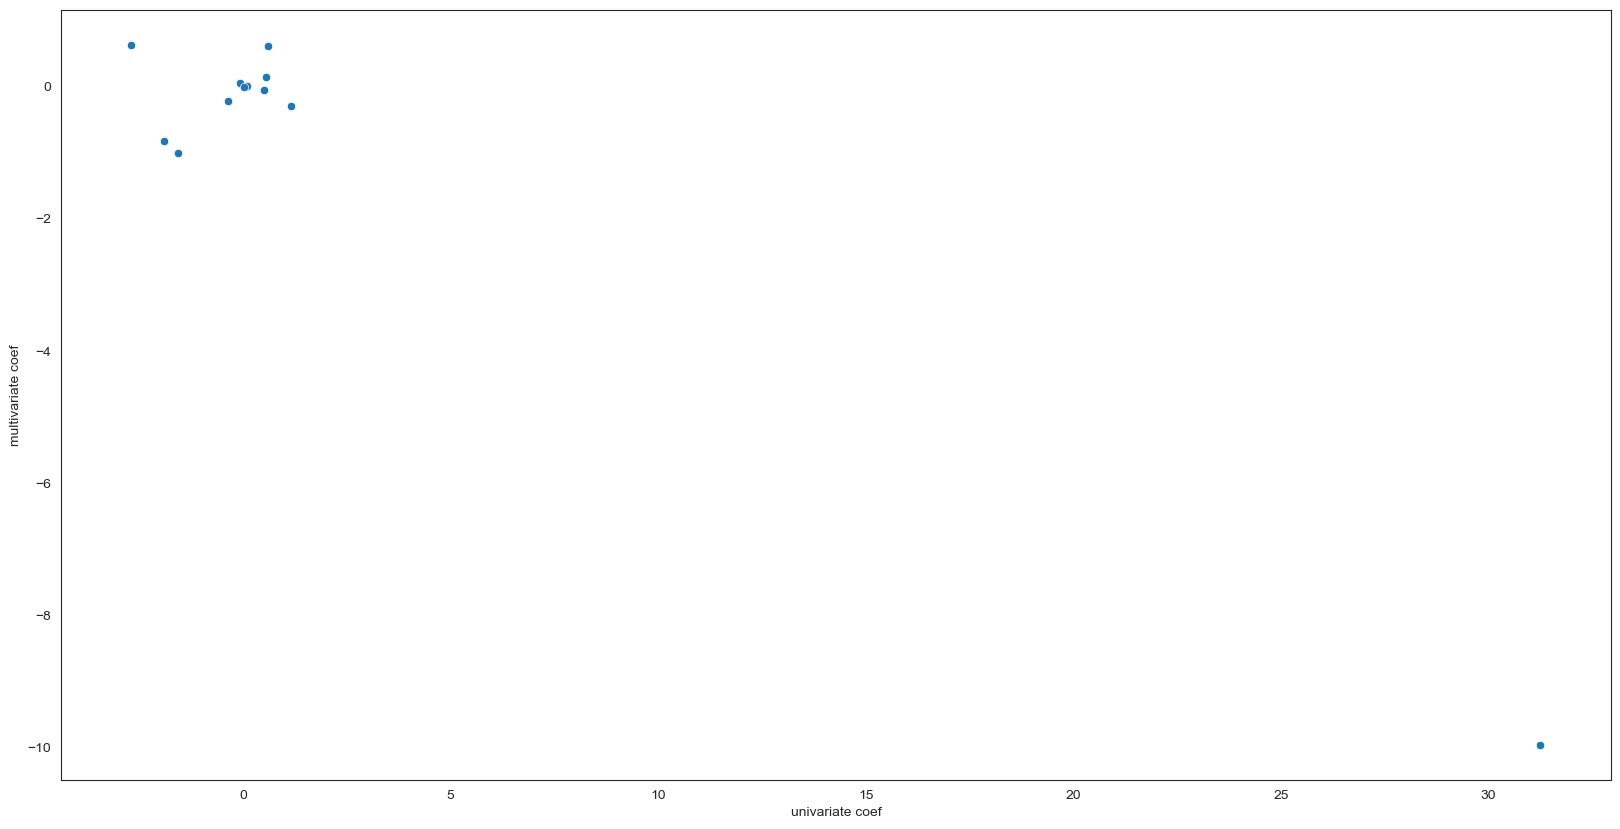

In [216]:
plt.figure(figsize=(20,10))
sns.scatterplot(x=univariate_params, y=multivariate_params)
plt.xlabel('univariate coef')
plt.ylabel('multivariate coef')
plt.show()

##### **D)** Is there evidence of non-linear association between any of the predictors and the response? To answer this question, for each predictor X, ft a model of the form

$$
Y = \beta_0 + \beta_1X + \beta_2X^2 + \beta_3X^3 + \varepsilon
$$